## Table of Content
**[1. Import Libraries](#1.-Import-Libraries)**

**[2. Read Data](#2.-Read-Data)**

**[3. Mathematicatical Computation](#3.-Mathematical-Computation)**
   - [3.1 Fill Batsman Points](#3.1-Fill-Batsman-Points)
   - [3.2 Fill Bowler Points](#3.2-Fill-Bowler-Points)
   - [3.3 Performance Measure](#3.3-Performance-Measure)
   - [3.4 Get Overall Data](#3.4-Get-Overall-Data)
   - [3.5 Players Performance by match](#3.5-Players-Performance-by-match)
   - [3.6 Player Average Performance](#3.6-Player-Average-Performance)
   - [3.7 Player Rolling Average Performance](#3.7-Player-Rolling-Average-Performance)
   - [3.8 Prepare ML Dataset for Batsman](#3.8-Prepare-ML-Dataset-for-Batsman)

**[4. Prepare and Analyse the Data](#4.-Prepare-and-Analyse-the-Data)**
   - [4.1 Understand Data](#4.1-Understand-Data)   
        - [4.1.1 Data Type](#4.1.1-Data-Type)
        - [4.1.2 Feature Engineering](#4.1.2-Feature-Engineering)
        - [4.1.3 Summary Statistics](#4.1.3-Summary-Statistics)
   - [4.2 Data Conversion](#4.2-Data-Conversion)
   - [4.3 Handling Missing Values](#4.3-Handling-Missing-Values)
   - [4.4 Handling Outliers](#4.4-Handling-Outliers)
   - [4.5 Study Correlation](#4.5-Study-Correlation)
   - [4.6 Feature Scaling](#4.6-Feature-Scaling)
        - [4.6.1 One Hot Encoding](#4.6.1-One-Hot-Encoding)
        - [4.6.2 Normalization](#4.6.2-Normalization)

**[5. Random Forest](#5.-Random-Forest)**
   - [5.1 Random Forest Model](#5.1-Random-Forest-Model)
   - [5.2 Random Forest with GridSearchCV](#5.2-Random-Forest-with-GridSearchCV)
   
**[6. Conclusion and Interpretation](#6.-Conclusion-and-Interpretation)**


In [1]:
! pip install --upgrade category_encoders

## 1. Import Libraries

In [2]:
# suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# import 'is_string_dtype' and 'is_numeric_dtype' to check the data type 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm


# 'SciPy' is used to perform scientific computations
from scipy.stats import jarque_bera
from scipy import stats

from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor

In [3]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

In [4]:
ML_Data_Bat=pd.read_excel("C:\\Users\\sathiygg\\Documents\\Dream11\\ML DATA SET\\ML_Data_Bat.xlsx")

In [5]:
df=ML_Data_Bat.copy()

## 4. Prepare and Analyse the Data

Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here we will analyze and prepare data to perform regression techniques:
1. Check dimensions of the dataframe in terms of rows and columns
2. Check the data types. If not as per business context, change the data types
3. Study Summary Statistics
4. Distribution of Variables
5. Analyze relationship between numeric variables
6. Check for missing values
7. Study correlation
8. Analyze relationship between numeric and categoric variables

Note: It is an art to explore data and one will need more and more practice to gain expertise in this area.

## 4.1 Understand Data

**Let us now see the number of variables and observations in the data.**

In [6]:
df.shape

(14229, 32)

### 4.1.1 Data Type

In [7]:
df.dtypes

ID                   int64
innings              int64
batter              object
BattingTeam         object
Performance Bat    float64
Venue               object
Position1            int64
Position2            int64
Position3            int64
Position4            int64
Position5            int64
Position6            int64
Position7            int64
Position8            int64
Position9            int64
Position10           int64
Position11           int64
Opp_Team            object
Bat_Start          float64
Bowler1            float64
Bowler2            float64
Bowler3            float64
Bowler4            float64
Bowler5            float64
Bowler6            float64
Bowler7            float64
Bowler8            float64
Bowler9            float64
Bowler10           float64
Bowler11           float64
Type                object
Batting Style       object
dtype: object

In [8]:
df.select_dtypes(include=["object"]).columns

Index(['batter', 'BattingTeam', 'Venue', 'Opp_Team', 'Type', 'Batting Style'], dtype='object')

In [9]:
int_col=['Position1', 'Position2', 'Position3',
       'Position4', 'Position5', 'Position6', 'Position7', 'Position8',
       'Position9', 'Position10', 'Position11']

In [10]:
for col in int_col:
    df[col]=df[col].astype(int)

In [11]:
df.select_dtypes(include=["object"]).columns

Index(['batter', 'BattingTeam', 'Venue', 'Opp_Team', 'Type', 'Batting Style'], dtype='object')

In [12]:
float_col=['Bat_Start', 'Bowler1',
       'Bowler2', 'Bowler3', 'Bowler4', 'Bowler5', 'Bowler6', 'Bowler7',
       'Bowler8', 'Bowler9', 'Bowler10', 'Bowler11']

In [13]:
df=df.replace('',np.nan, regex=True)

In [14]:
for col in float_col:
    df[col]=df[col].astype(float)

In [15]:
df.dtypes

ID                   int64
innings              int64
batter              object
BattingTeam         object
Performance Bat    float64
Venue               object
Position1            int32
Position2            int32
Position3            int32
Position4            int32
Position5            int32
Position6            int32
Position7            int32
Position8            int32
Position9            int32
Position10           int32
Position11           int32
Opp_Team            object
Bat_Start          float64
Bowler1            float64
Bowler2            float64
Bowler3            float64
Bowler4            float64
Bowler5            float64
Bowler6            float64
Bowler7            float64
Bowler8            float64
Bowler9            float64
Bowler10           float64
Bowler11           float64
Type                object
Batting Style       object
dtype: object

### 4.1.2 Feature Engineering

For feature engineering, we Drop the redundant variables

In [16]:
df=df.drop(["batter","ID"],axis=1)

In [17]:
df.head()

innings       BattingTeam  Performance Bat  \
0        1  Rajasthan Royals       108.976497   
1        1  Rajasthan Royals       116.024011   
2        1  Rajasthan Royals       102.132776   
3        1  Rajasthan Royals        99.180791   
4        1  Rajasthan Royals       106.066403   

                              Venue  Position1  Position2  Position3  \
0  Narendra Modi Stadium, Ahmedabad          1          0          0   
1  Narendra Modi Stadium, Ahmedabad          0          1          0   
2  Narendra Modi Stadium, Ahmedabad          0          0          1   
3  Narendra Modi Stadium, Ahmedabad          0          0          0   
4  Narendra Modi Stadium, Ahmedabad          0          0          0   

   Position4  Position5  Position6  Position7  Position8  Position9  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          1          0          0          0          0          0   
4          0          1          0          0          0          0   

   Position10  Position11        Opp_Team   Bat_Start     Bowler1     Bowler2  \
0           0           0  Gujarat Titans  105.176514  110.510876  111.707792   
1           0           0  Gujarat Titans  135.156780  110.510876  111.707792   
2           0           0  Gujarat Titans  110.161804  110.510876  111.707792   
3           0           0  Gujarat Titans  105.806968  110.510876  111.707792   
4           0           0  Gujarat Titans  102.345436  110.510876  111.707792   

      Bowler3     Bowler4     Bowler5     Bowler6     Bowler7     Bowler8  \
0  109.647523  114.554365  119.865873  127.045503  127.045503  127.045503   
1  109.647523  114.554365  119.865873  127.045503  127.045503  127.045503   
2  109.647523  114.554365  119.865873  127.045503  127.045503  127.045503   
3  109.647523  114.554365  119.865873  127.045503  127.045503  127.045503   
4  109.647523  114.554365  119.865873  127.045503  127.045503  127.045503   

   Bowler9  Bowler10  Bowler11            Type Batting Style  
0      NaN       NaN       NaN        Batsman    Left Handed  
1      NaN       NaN       NaN  Wicket-Keeper   Right Handed  
2      NaN       NaN       NaN  Wicket-Keeper   Right Handed  
3      NaN       NaN       NaN        Batsman    Left Handed  
4      NaN       NaN       NaN        Batsman    Left Handed

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14229 entries, 0 to 14228
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   innings          14229 non-null  int64  
 1   BattingTeam      14229 non-null  object 
 2   Performance Bat  14229 non-null  float64
 3   Venue            14229 non-null  object 
 4   Position1        14229 non-null  int32  
 5   Position2        14229 non-null  int32  
 6   Position3        14229 non-null  int32  
 7   Position4        14229 non-null  int32  
 8   Position5        14229 non-null  int32  
 9   Position6        14229 non-null  int32  
 10  Position7        14229 non-null  int32  
 11  Position8        14229 non-null  int32  
 12  Position9        14229 non-null  int32  
 13  Position10       14229 non-null  int32  
 14  Position11       14229 non-null  int32  
 15  Opp_Team         14229 non-null  object 
 16  Bat_Start        14229 non-null  float64
 17  Bowler1     

### 4.1.3 Summary Statistics

Here we take a look at the summary of each attribute. This includes the count, mean, the minimum and maximum values as well as some percentiles for numeric variables and count, unique, top, frequency for other variable types.

In our dataset we have both numerical and categorical variables. Now we check for summary statistics of all the variables

1. For numerical variables, use the describe()
2. For categorical variables use the describe(include='object')

In [19]:
df.describe().transpose()

count        mean        std         min         25%  \
innings          14229.0    1.489985   0.499917    1.000000    1.000000   
Performance Bat  14229.0  108.933308  10.082429   94.250000  101.229284   
Position1        14229.0    0.133390   0.340007    0.000000    0.000000   
Position2        14229.0    0.132757   0.339324    0.000000    0.000000   
Position3        14229.0    0.131843   0.338332    0.000000    0.000000   
Position4        14229.0    0.128048   0.334155    0.000000    0.000000   
Position5        14229.0    0.120950   0.326081    0.000000    0.000000   
Position6        14229.0    0.106473   0.308453    0.000000    0.000000   
Position7        14229.0    0.086373   0.280924    0.000000    0.000000   
Position8        14229.0    0.066203   0.248645    0.000000    0.000000   
Position9        14229.0    0.046736   0.211079    0.000000    0.000000   
Position10       14229.0    0.030431   0.171776    0.000000    0.000000   
Position11       14229.0    0.016797   0.128513    0.000000    0.000000   
Bat_Start        14229.0  108.988043   6.396032   96.939394  104.186048   
Bowler1          14229.0  118.965760   8.940125   99.911111  112.816667   
Bowler2          14229.0  118.791406   8.560200   99.586081  112.657143   
Bowler3          14229.0  118.512254   8.953255  100.207407  112.027275   
Bowler4          14229.0  117.640474   8.612526   99.250000  111.729846   
Bowler5          14203.0  115.288465   8.403806   99.142857  108.935755   
Bowler6          12776.0  113.324541   8.409568   99.000000  106.936753   
Bowler7          10564.0  113.072130   8.518374   98.800000  106.766667   
Bowler8           7619.0  112.349983   8.155812   99.142857  106.302778   
Bowler9           5035.0  112.484034   8.092265   99.333333  106.608923   
Bowler10          2695.0  112.472001   7.633318   99.333333  106.936753   
Bowler11          1382.0  112.548128   7.563864   99.984127  106.561376   

                        50%         75%         max  
innings            1.000000    2.000000    2.000000  
Performance Bat  106.046453  113.259416  175.595104  
Position1          0.000000    0.000000    1.000000  
Position2          0.000000    0.000000    1.000000  
Position3          0.000000    0.000000    1.000000  
Position4          0.000000    0.000000    1.000000  
Position5          0.000000    0.000000    1.000000  
Position6          0.000000    0.000000    1.000000  
Position7          0.000000    0.000000    1.000000  
Position8          0.000000    0.000000    1.000000  
Position9          0.000000    0.000000    1.000000  
Position10         0.000000    0.000000    1.000000  
Position11         0.000000    0.000000    1.000000  
Bat_Start        107.904180  112.751896  145.997175  
Bowler1          117.993891  124.001872  162.608345  
Bowler2          118.057920  124.086762  153.324315  
Bowler3          117.622018  123.945859  159.432874  
Bowler4          116.630087  123.094577  150.476912  
Bowler5          114.401214  120.431433  148.935387  
Bowler6          112.228571  118.392737  148.935387  
Bowler7          111.751198  117.976431  148.935387  
Bowler8          111.248713  117.219281  148.935387  
Bowler9          111.747499  117.196241  151.203704  
Bowler10         112.097884  116.369048  138.205026  
Bowler11         112.228571  116.576190  135.465484

In [20]:
df.describe(include='object').transpose()

count unique             top  freq
BattingTeam    14229     18  Mumbai Indians  1747
Venue          14229     49    Eden Gardens  1131
Opp_Team       14229     18  Mumbai Indians  1778
Type           14229      4        Batsman   5955
Batting Style  14229      2    Right Handed  9945

## 4.2 Data Conversion

Here we convert the data as required

In [21]:
df.innings.unique()

array([1, 2], dtype=int64)

In [22]:
df["innings"]=df["innings"].replace(to_replace=[1,2], value=[0,1])

In [23]:
df.rename(columns={"Batting Style": "Bat_Style", "Bat_Start":"Bat Start","BattingTeam":"Team"}, inplace=True)

In [24]:
df.head()

innings              Team  Performance Bat  \
0        0  Rajasthan Royals       108.976497   
1        0  Rajasthan Royals       116.024011   
2        0  Rajasthan Royals       102.132776   
3        0  Rajasthan Royals        99.180791   
4        0  Rajasthan Royals       106.066403   

                              Venue  Position1  Position2  Position3  \
0  Narendra Modi Stadium, Ahmedabad          1          0          0   
1  Narendra Modi Stadium, Ahmedabad          0          1          0   
2  Narendra Modi Stadium, Ahmedabad          0          0          1   
3  Narendra Modi Stadium, Ahmedabad          0          0          0   
4  Narendra Modi Stadium, Ahmedabad          0          0          0   

   Position4  Position5  Position6  Position7  Position8  Position9  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          1          0          0          0          0          0   
4          0          1          0          0          0          0   

   Position10  Position11        Opp_Team   Bat Start     Bowler1     Bowler2  \
0           0           0  Gujarat Titans  105.176514  110.510876  111.707792   
1           0           0  Gujarat Titans  135.156780  110.510876  111.707792   
2           0           0  Gujarat Titans  110.161804  110.510876  111.707792   
3           0           0  Gujarat Titans  105.806968  110.510876  111.707792   
4           0           0  Gujarat Titans  102.345436  110.510876  111.707792   

      Bowler3     Bowler4     Bowler5     Bowler6     Bowler7     Bowler8  \
0  109.647523  114.554365  119.865873  127.045503  127.045503  127.045503   
1  109.647523  114.554365  119.865873  127.045503  127.045503  127.045503   
2  109.647523  114.554365  119.865873  127.045503  127.045503  127.045503   
3  109.647523  114.554365  119.865873  127.045503  127.045503  127.045503   
4  109.647523  114.554365  119.865873  127.045503  127.045503  127.045503   

   Bowler9  Bowler10  Bowler11            Type     Bat_Style  
0      NaN       NaN       NaN        Batsman    Left Handed  
1      NaN       NaN       NaN  Wicket-Keeper   Right Handed  
2      NaN       NaN       NaN  Wicket-Keeper   Right Handed  
3      NaN       NaN       NaN        Batsman    Left Handed  
4      NaN       NaN       NaN        Batsman    Left Handed

In [25]:
df.Team.unique()

array(['Rajasthan Royals', 'Gujarat Titans',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Sunrisers Hyderabad', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Delhi Daredevils', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Pune Warriors',
       'Deccan Chargers', 'Kochi Tuskers Kerala'], dtype=object)

In [26]:
df=df.replace(to_replace=['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'],
             value=["Kolkata","Bangalore","Chennai","Punjab","Rajasthan","Delhi","Mumbai","Hyderabad","Kerala","Maharashtra",
                    "Hyderabad","Maharashtra","Gujarat","Maharashtra","Delhi","Punjab","Lucknow","Gujarat"])

In [27]:
df.Team.unique()

array(['Rajasthan', 'Gujarat', 'Bangalore', 'Lucknow', 'Hyderabad',
       'Punjab', 'Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Maharashtra',
       'Kerala'], dtype=object)

In [28]:
df.Type.unique()

array(['Batsman ', 'Wicket-Keeper ', 'All-Rounder ', 'Bowler '],
      dtype=object)

In [29]:
df=df.replace('Wicket-Keeper ','Wicket-keeper ')

In [30]:
df.Type.unique()

array(['Batsman ', 'Wicket-keeper ', 'All-Rounder ', 'Bowler '],
      dtype=object)

In [31]:
df=df.replace(to_replace=['All-Rounder ', 'Batsman ', 'Bowler ', 'Wicket-keeper '],
             value=["AR","Bat","Bowl","Bat"])

In [32]:
df.Type.unique()

array(['Bat', 'AR', 'Bowl'], dtype=object)

In [33]:
df.Bat_Style.unique()

array(['Left Handed', 'Right Handed'], dtype=object)

In [34]:
df=df.replace(to_replace=['Right Handed', 'Left Handed'],
             value=["RH","LH"])

In [35]:
df.Bat_Style.unique()

array(['LH', 'RH'], dtype=object)

In [36]:
df.Venue.unique()

array(['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens, Kolkata',
       'Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Zayed Cricket Stadium, Abu Dhabi', 'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai', 'Sheikh Zayed Stadium',
       'Rajiv Gandhi International Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'MA Chidambaram Stadium', 'Wankhede Stadium',
       'Punjab Cricket Association IS Bindra Stadium',
       'M.Chinnaswamy Stadium', 'Arun Jaitley Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium',
       'Maharashtra Cricket Association Stadium',
       'Holkar Cricket Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'M Chinnaswamy Stadium', 'Feroz Shah Kotla', 'Green Park',
       'Punjab Cricket A

In [37]:
df.Venue.nunique()

49

In [38]:
df=df.replace(to_replace=['M Chinnaswamy Stadium','Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium','Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy','Newlands', "St George's Park", 'Kingsmead', 
       'SuperSport Park','Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium','Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai','Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium','Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium','Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium','Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium','Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Saurashtra Cricket Association Stadium', 'Green Park','M.Chinnaswamy Stadium',
       'Punjab Cricket Association IS Bindra Stadium','Rajiv Gandhi International Stadium', 'MA Chidambaram Stadium',
       'Arun Jaitley Stadium', 'MA Chidambaram Stadium, Chepauk, Chennai','Wankhede Stadium, Mumbai', 'Narendra Modi Stadium, Ahmedabad',
       'Arun Jaitley Stadium, Delhi', 'Zayed Cricket Stadium, Abu Dhabi','Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune','Eden Gardens, Kolkata'],
        value=['Chinnaswamy','Punjab', 'Feroz',
       'Wankhede', 'Eden', 'Sawai','Rajiv',
       'Chidambaram', 'DY Patil','Newlands', "St George", 'Kingsmead', 
       'SuperSpor','Buffalo', 'New Wanderers', 'De Beers',
       'OUTsurance', 'Brabourne','Sardar', 'Barabati',
       'Brabourne','Vidarbha',
       'Himachal', 'Nehru','Holkar',
       'Rajasekhara','Subrata',
       'Maharashtra','Shaheed',
       'JSCA', 'Sheikh',
       'Sharjah', 'Dubai','Punjab',
       'Saurashtra', 'Green Park','Chinnaswamy',
       'Punjab','Rajiv', 'Chidambaram',
       'Arun', 'Chidambaram','Wankhede', 'Narendra',
       'Arun', 'Zayed','DY Patil',
       'Maharashtra','Eden'])

In [39]:
df.Venue.nunique()

37

In [40]:
df.Venue.unique()

array(['Narendra', 'Eden', 'Wankhede', 'Brabourne', 'DY Patil',
       'Maharashtra', 'Dubai', 'Sharjah', 'Zayed', 'Arun', 'Chidambaram',
       'Sheikh', 'Rajiv', 'Rajasekhara', 'Punjab', 'Chinnaswamy', 'Sawai',
       'Holkar', 'Feroz', 'Green Park', 'Saurashtra', 'Shaheed', 'JSCA',
       'Sardar', 'Barabati', 'Subrata', 'Himachal', 'Nehru', 'Vidarbha',
       'New Wanderers', 'SuperSpor', 'Kingsmead', 'OUTsurance',
       'St George', 'De Beers', 'Buffalo', 'Newlands'], dtype=object)

In [41]:
df.shape

(14229, 30)

## 4.3 Handling Missing Values

In [42]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    

# add the column containing data type of each variable
missing_data['Type'] = df[missing_data.index].dtypes
missing_data

Total  Percentage of Missing Values     Type
Bowler11         12847                     90.287441  float64
Bowler10         11534                     81.059807  float64
Bowler9           9194                     64.614520  float64
Bowler8           6610                     46.454424  float64
Bowler7           3665                     25.757256  float64
Bowler6           1453                     10.211540  float64
Bowler5             26                      0.182725  float64
innings              0                      0.000000    int64
Team                 0                      0.000000   object
Type                 0                      0.000000   object
Bowler4              0                      0.000000  float64
Bowler3              0                      0.000000  float64
Bowler2              0                      0.000000  float64
Bowler1              0                      0.000000  float64
Bat Start            0                      0.000000  float64
Opp_Team             0                      0.000000   object
Position11           0                      0.000000    int32
Position10           0                      0.000000    int32
Position9            0                      0.000000    int32
Position8            0                      0.000000    int32
Position7            0                      0.000000    int32
Position6            0                      0.000000    int32
Position5            0                      0.000000    int32
Position4            0                      0.000000    int32
Position3            0                      0.000000    int32
Position2            0                      0.000000    int32
Position1            0                      0.000000    int32
Venue                0                      0.000000   object
Performance Bat      0                      0.000000  float64
Bat_Style            0                      0.000000   object

In [43]:
df=df.drop(["Bowler8","Bowler9","Bowler10","Bowler11"],axis=1)

we can fill the missing values with the corrrepoding team mean in the respestive features

In [44]:
df["Opp_Team"].unique()

array(['Gujarat', 'Rajasthan', 'Bangalore', 'Lucknow', 'Punjab',
       'Hyderabad', 'Mumbai', 'Delhi', 'Chennai', 'Kolkata',
       'Maharashtra', 'Kerala'], dtype=object)

In [45]:
groupby=df.groupby("Opp_Team").mean()[["Bowler5","Bowler6","Bowler7"]]

In [46]:
groupby

Bowler5     Bowler6     Bowler7
Opp_Team                                       
Bangalore    113.784212  112.497733  112.976004
Chennai      117.688478  116.560267  115.791636
Delhi        115.967835  113.600332  112.197059
Gujarat      115.727857  112.524542  113.231901
Hyderabad    115.032230  113.277755  111.885250
Kerala       113.729894  110.563015  114.375462
Kolkata      114.859078  113.493282  114.531852
Lucknow      114.909817  114.982576  115.286101
Maharashtra  113.250758  113.896601  113.747534
Mumbai       114.507886  112.313739  112.955729
Punjab       117.163877  112.398875  110.664853
Rajasthan    113.986185  112.358498  112.313840

In [47]:
Opp_Team_name=groupby.index.values.tolist()

In [48]:
Opp_Team_name

['Bangalore',
 'Chennai',
 'Delhi',
 'Gujarat',
 'Hyderabad',
 'Kerala',
 'Kolkata',
 'Lucknow',
 'Maharashtra',
 'Mumbai',
 'Punjab',
 'Rajasthan']

In [49]:
csk=Opp_Team_name.index("Chennai")
dc=Opp_Team_name.index("Delhi")
gt=Opp_Team_name.index("Gujarat")
kkr=Opp_Team_name.index("Kolkata")
lsg=Opp_Team_name.index("Lucknow")
mi=Opp_Team_name.index("Mumbai")
pk=Opp_Team_name.index("Punjab")
rr=Opp_Team_name.index("Rajasthan")
rcb=Opp_Team_name.index("Bangalore")
sh=Opp_Team_name.index("Hyderabad")
kt=Opp_Team_name.index("Kerala")
mh=Opp_Team_name.index("Maharashtra")

In [50]:

def bowler5_fill(df):
    Opp_Team     = df["Opp_Team"]
    Bowler   ="Bowler5"
    Bowler5  = df[Bowler]
    
        
    if pd.isnull(Bowler5):
        if Opp_Team == 'Rajasthan':
            team_no=rr
        
        if Opp_Team == 'Gujarat':
            team_no=gt
            
        if Opp_Team == 'Kolkata':
            team_no=kkr
        
        if Opp_Team == 'Punjab':
            team_no=pk        
        
            
        if Opp_Team == 'Mumbai':
            team_no=mi
            
        if Opp_Team == 'Bangalore':
            team_no=rcb
            
        if Opp_Team == 'Delhi':
            team_no=dc
            
        if Opp_Team == 'Hyderabad':
            team_no=sh
            
        if Opp_Team == 'Chennai':
            team_no=csk
            
        if Opp_Team == 'Lucknow':
            team_no=lsg
        if Opp_Team == 'Kerala':
            team_no=kt
        if Opp_Team == 'Maharashtra':
            team_no=mh
        
        if Opp_Team == 'Rajasthan':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        
        if Opp_Team == 'Gujarat':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Kolkata':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        
        if Opp_Team == 'Punjab':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean          
        
            
        if Opp_Team == 'Mumbai':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Bangalore':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Delhi':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Hyderabad':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Chennai':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Lucknow':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        if Opp_Team == 'Kerala':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        if Opp_Team == 'Maharashtra':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            

    else:
        return Bowler5
    


In [51]:

def bowler6_fill(df):
    Opp_Team     = df["Opp_Team"]
    Bowler   ="Bowler6"
    Bowler6  = df[Bowler]
    
        
    if pd.isnull(Bowler6):
        if Opp_Team == 'Rajasthan':
            team_no=rr
        
        if Opp_Team == 'Gujarat':
            team_no=gt
            
        if Opp_Team == 'Kolkata':
            team_no=kkr
        
        if Opp_Team == 'Punjab':
            team_no=pk        
        
            
        if Opp_Team == 'Mumbai':
            team_no=mi
            
        if Opp_Team == 'Bangalore':
            team_no=rcb
            
        if Opp_Team == 'Delhi':
            team_no=dc
            
        if Opp_Team == 'Hyderabad':
            team_no=sh
            
        if Opp_Team == 'Chennai':
            team_no=csk
            
        if Opp_Team == 'Lucknow':
            team_no=lsg
        if Opp_Team == 'Kerala':
            team_no=kt
        if Opp_Team == 'Maharashtra':
            team_no=mh
        
        if Opp_Team == 'Rajasthan':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        
        if Opp_Team == 'Gujarat':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Kolkata':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        
        if Opp_Team == 'Punjab':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean          
        
            
        if Opp_Team == 'Mumbai':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Bangalore':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Delhi':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Hyderabad':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Chennai':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Lucknow':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        if Opp_Team == 'Kerala':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        if Opp_Team == 'Maharashtra':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            

    else:
        return Bowler6
    


In [52]:

def bowler7_fill(df):
    Opp_Team     = df["Opp_Team"]
    Bowler   ="Bowler7"
    Bowler7  = df[Bowler]
    
        
    if pd.isnull(Bowler7):
        if Opp_Team == 'Rajasthan':
            team_no=rr
        
        if Opp_Team == 'Gujarat':
            team_no=gt
            
        if Opp_Team == 'Kolkata':
            team_no=kkr
        
        if Opp_Team == 'Punjab':
            team_no=pk        
        
            
        if Opp_Team == 'Mumbai':
            team_no=mi
            
        if Opp_Team == 'Bangalore':
            team_no=rcb
            
        if Opp_Team == 'Delhi':
            team_no=dc
            
        if Opp_Team == 'Hyderabad':
            team_no=sh
            
        if Opp_Team == 'Chennai':
            team_no=csk
            
        if Opp_Team == 'Lucknow':
            team_no=lsg
        if Opp_Team == 'Kerala':
            team_no=kt
        if Opp_Team == 'Maharashtra':
            team_no=mh
        
        if Opp_Team == 'Rajasthan':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        
        if Opp_Team == 'Gujarat':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Kolkata':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        
        if Opp_Team == 'Punjab':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean          
        
            
        if Opp_Team == 'Mumbai':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Bangalore':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Delhi':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Hyderabad':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Chennai':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Lucknow':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        if Opp_Team == 'Kerala':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        if Opp_Team == 'Maharashtra':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            

    else:
        return Bowler7
    


In [53]:
df["Bowler5"]=df.apply(bowler5_fill,axis=1)
df["Bowler6"]=df.apply(bowler6_fill,axis=1)
df["Bowler7"]=df.apply(bowler7_fill,axis=1)

In [54]:
df.describe()

innings  Performance Bat     Position1     Position2  \
count  14229.000000     14229.000000  14229.000000  14229.000000   
mean       0.489985       108.933308      0.133390      0.132757   
std        0.499917        10.082429      0.340007      0.339324   
min        0.000000        94.250000      0.000000      0.000000   
25%        0.000000       101.229284      0.000000      0.000000   
50%        0.000000       106.046453      0.000000      0.000000   
75%        1.000000       113.259416      0.000000      0.000000   
max        1.000000       175.595104      1.000000      1.000000   

          Position3     Position4     Position5     Position6     Position7  \
count  14229.000000  14229.000000  14229.000000  14229.000000  14229.000000   
mean       0.131843      0.128048      0.120950      0.106473      0.086373   
std        0.338332      0.334155      0.326081      0.308453      0.280924   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Position8     Position9    Position10    Position11     Bat Start  \
count  14229.000000  14229.000000  14229.000000  14229.000000  14229.000000   
mean       0.066203      0.046736      0.030431      0.016797    108.988043   
std        0.248645      0.211079      0.171776      0.128513      6.396032   
min        0.000000      0.000000      0.000000      0.000000     96.939394   
25%        0.000000      0.000000      0.000000      0.000000    104.186048   
50%        0.000000      0.000000      0.000000      0.000000    107.904180   
75%        0.000000      0.000000      0.000000      0.000000    112.751896   
max        1.000000      1.000000      1.000000      1.000000    145.997175   

            Bowler1       Bowler2       Bowler3       Bowler4       Bowler5  \
count  14229.000000  14229.000000  14229.000000  14229.000000  14229.000000   
mean     118.965760    118.791406    118.512254    117.640474    115.286384   
std        8.940125      8.560200      8.953255      8.612526      8.396325   
min       99.911111     99.586081    100.207407     99.250000     99.142857   
25%      112.816667    112.657143    112.027275    111.729846    108.941087   
50%      117.993891    118.057920    117.622018    116.630087    114.401214   
75%      124.001872    124.086762    123.945859    123.094577    120.421378   
max      162.608345    153.324315    159.432874    150.476912    148.935387   

            Bowler6       Bowler7  
count  14229.000000  14229.000000  
mean     113.317377    112.990725  
std        7.978909      7.378981  
min       99.000000     98.800000  
25%      107.571813    108.257756  
50%      112.497733    112.197059  
75%      117.436195    115.791636  
max      148.935387    148.935387

In [55]:
df.head()

innings       Team  Performance Bat     Venue  Position1  Position2  \
0        0  Rajasthan       108.976497  Narendra          1          0   
1        0  Rajasthan       116.024011  Narendra          0          1   
2        0  Rajasthan       102.132776  Narendra          0          0   
3        0  Rajasthan        99.180791  Narendra          0          0   
4        0  Rajasthan       106.066403  Narendra          0          0   

   Position3  Position4  Position5  Position6  Position7  Position8  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          1          0          0          0          0          0   
3          0          1          0          0          0          0   
4          0          0          1          0          0          0   

   Position9  Position10  Position11 Opp_Team   Bat Start     Bowler1  \
0          0           0           0  Gujarat  105.176514  110.510876   
1          0           0           0  Gujarat  135.156780  110.510876   
2          0           0           0  Gujarat  110.161804  110.510876   
3          0           0           0  Gujarat  105.806968  110.510876   
4          0           0           0  Gujarat  102.345436  110.510876   

      Bowler2     Bowler3     Bowler4     Bowler5     Bowler6     Bowler7  \
0  111.707792  109.647523  114.554365  119.865873  127.045503  127.045503   
1  111.707792  109.647523  114.554365  119.865873  127.045503  127.045503   
2  111.707792  109.647523  114.554365  119.865873  127.045503  127.045503   
3  111.707792  109.647523  114.554365  119.865873  127.045503  127.045503   
4  111.707792  109.647523  114.554365  119.865873  127.045503  127.045503   

  Type Bat_Style  
0  Bat        LH  
1  Bat        RH  
2  Bat        RH  
3  Bat        LH  
4  Bat        LH

In [56]:
df.dtypes

innings              int64
Team                object
Performance Bat    float64
Venue               object
Position1            int32
Position2            int32
Position3            int32
Position4            int32
Position5            int32
Position6            int32
Position7            int32
Position8            int32
Position9            int32
Position10           int32
Position11           int32
Opp_Team            object
Bat Start          float64
Bowler1            float64
Bowler2            float64
Bowler3            float64
Bowler4            float64
Bowler5            float64
Bowler6            float64
Bowler7            float64
Type                object
Bat_Style           object
dtype: object

In [57]:
df.shape

(14229, 26)

In [58]:
for i in df.columns:
    print(i, ' ---> ', df[str(i)].nunique(),' ---> ', df[str(i)].dtypes)
    

innings  --->  2  --->  int64
Team  --->  12  --->  object
Performance Bat  --->  9586  --->  float64
Venue  --->  37  --->  object
Position1  --->  2  --->  int32
Position2  --->  2  --->  int32
Position3  --->  2  --->  int32
Position4  --->  2  --->  int32
Position5  --->  2  --->  int32
Position6  --->  2  --->  int32
Position7  --->  2  --->  int32
Position8  --->  2  --->  int32
Position9  --->  2  --->  int32
Position10  --->  2  --->  int32
Position11  --->  2  --->  int32
Opp_Team  --->  12  --->  object
Bat Start  --->  13528  --->  float64
Bowler1  --->  1837  --->  float64
Bowler2  --->  1871  --->  float64
Bowler3  --->  1858  --->  float64
Bowler4  --->  1859  --->  float64
Bowler5  --->  1849  --->  float64
Bowler6  --->  1662  --->  float64
Bowler7  --->  1384  --->  float64
Type  --->  3  --->  object
Bat_Style  --->  2  --->  object


In [59]:
# summary of categorical variables
df.describe(include=object)

# Note: If we pass 'include=object' to the .describe(), it will return descriptive statistics for categorical variables only

Team     Venue Opp_Team   Type Bat_Style
count    14229     14229    14229  14229     14229
unique      12        37       12      3         2
top     Mumbai  Wankhede   Mumbai    Bat        RH
freq      1747      1588     1778   7899      9945

In [60]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['innings', 'Performance Bat', 'Position1', 'Position2', 'Position3',
       'Position4', 'Position5', 'Position6', 'Position7', 'Position8',
       'Position9', 'Position10', 'Position11', 'Bat Start', 'Bowler1',
       'Bowler2', 'Bowler3', 'Bowler4', 'Bowler5', 'Bowler6', 'Bowler7'],
      dtype='object')

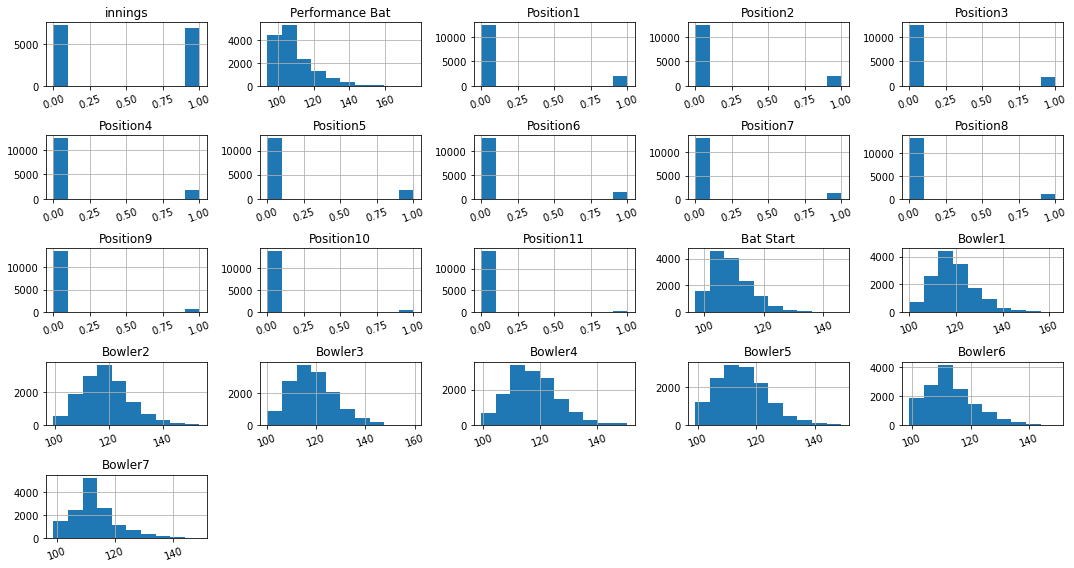

In [61]:
# plot the histogram of numeric variables
# the hist() function considers the numeric variables only, by default
# rotate the x-axis labels by 20 degree using the parameter, 'xrot'
df.hist(xrot = 20, )

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

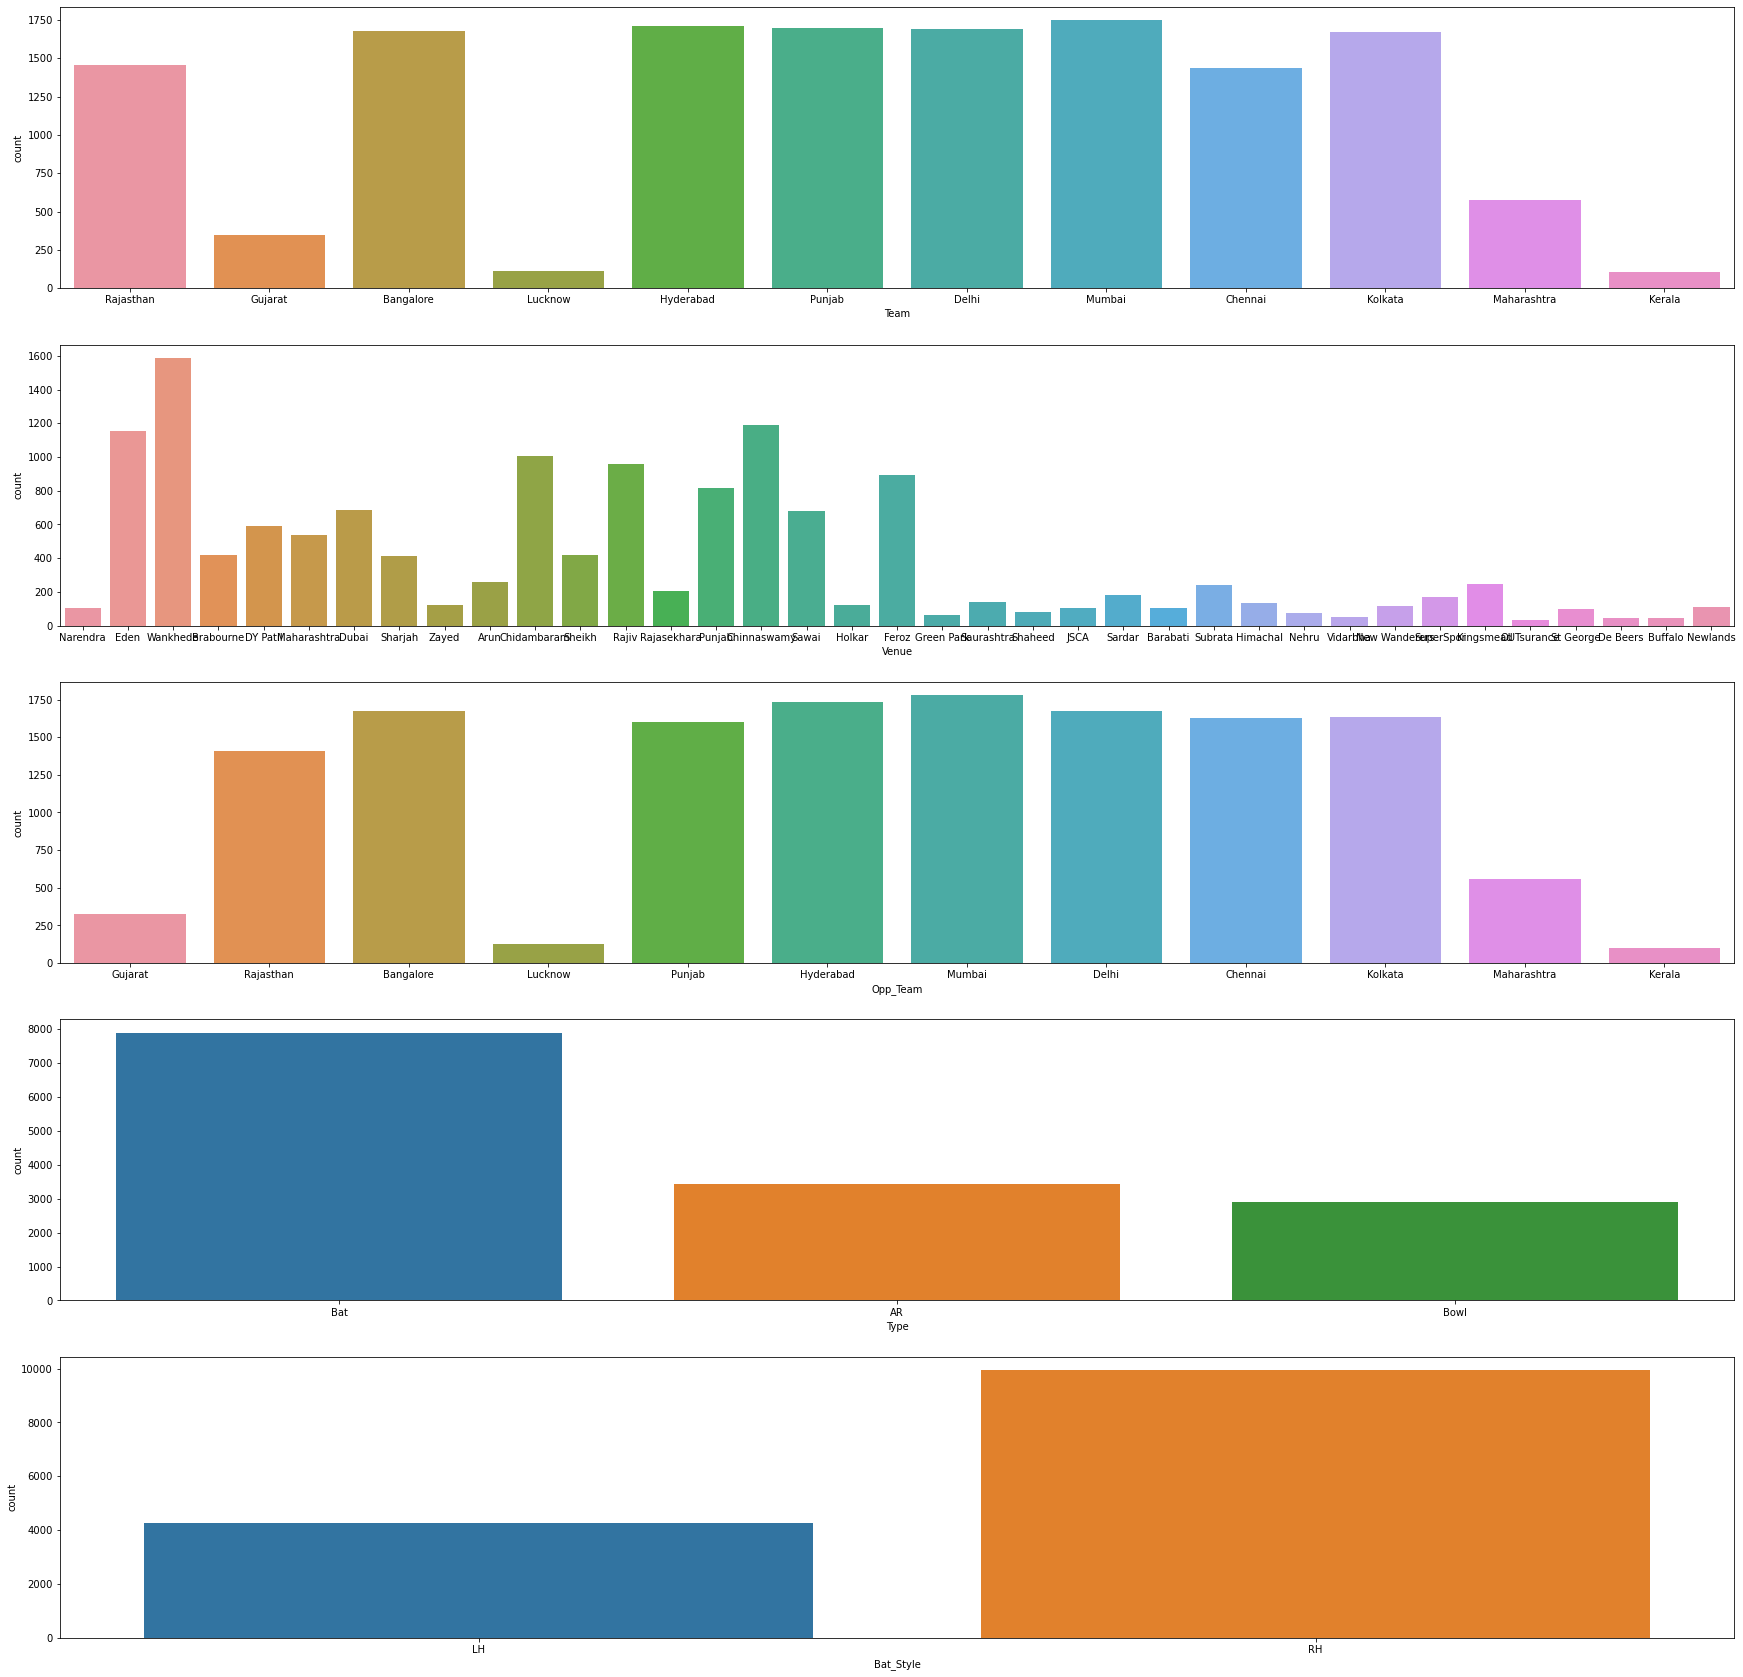

In [62]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in df:

    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(5,1, figsize = (30, 30))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(df[variable], ax = subplot)
    
# display the plot
plt.show()

In [63]:
categorical

['Team', 'Venue', 'Opp_Team', 'Type', 'Bat_Style']

## 4.4 Handling Outliers

Here we can handle the oultier using IQR with max= Q3 + 3 * IQR. It will remove only extreme outliers.

**Handling Outliers with respect to Venue**

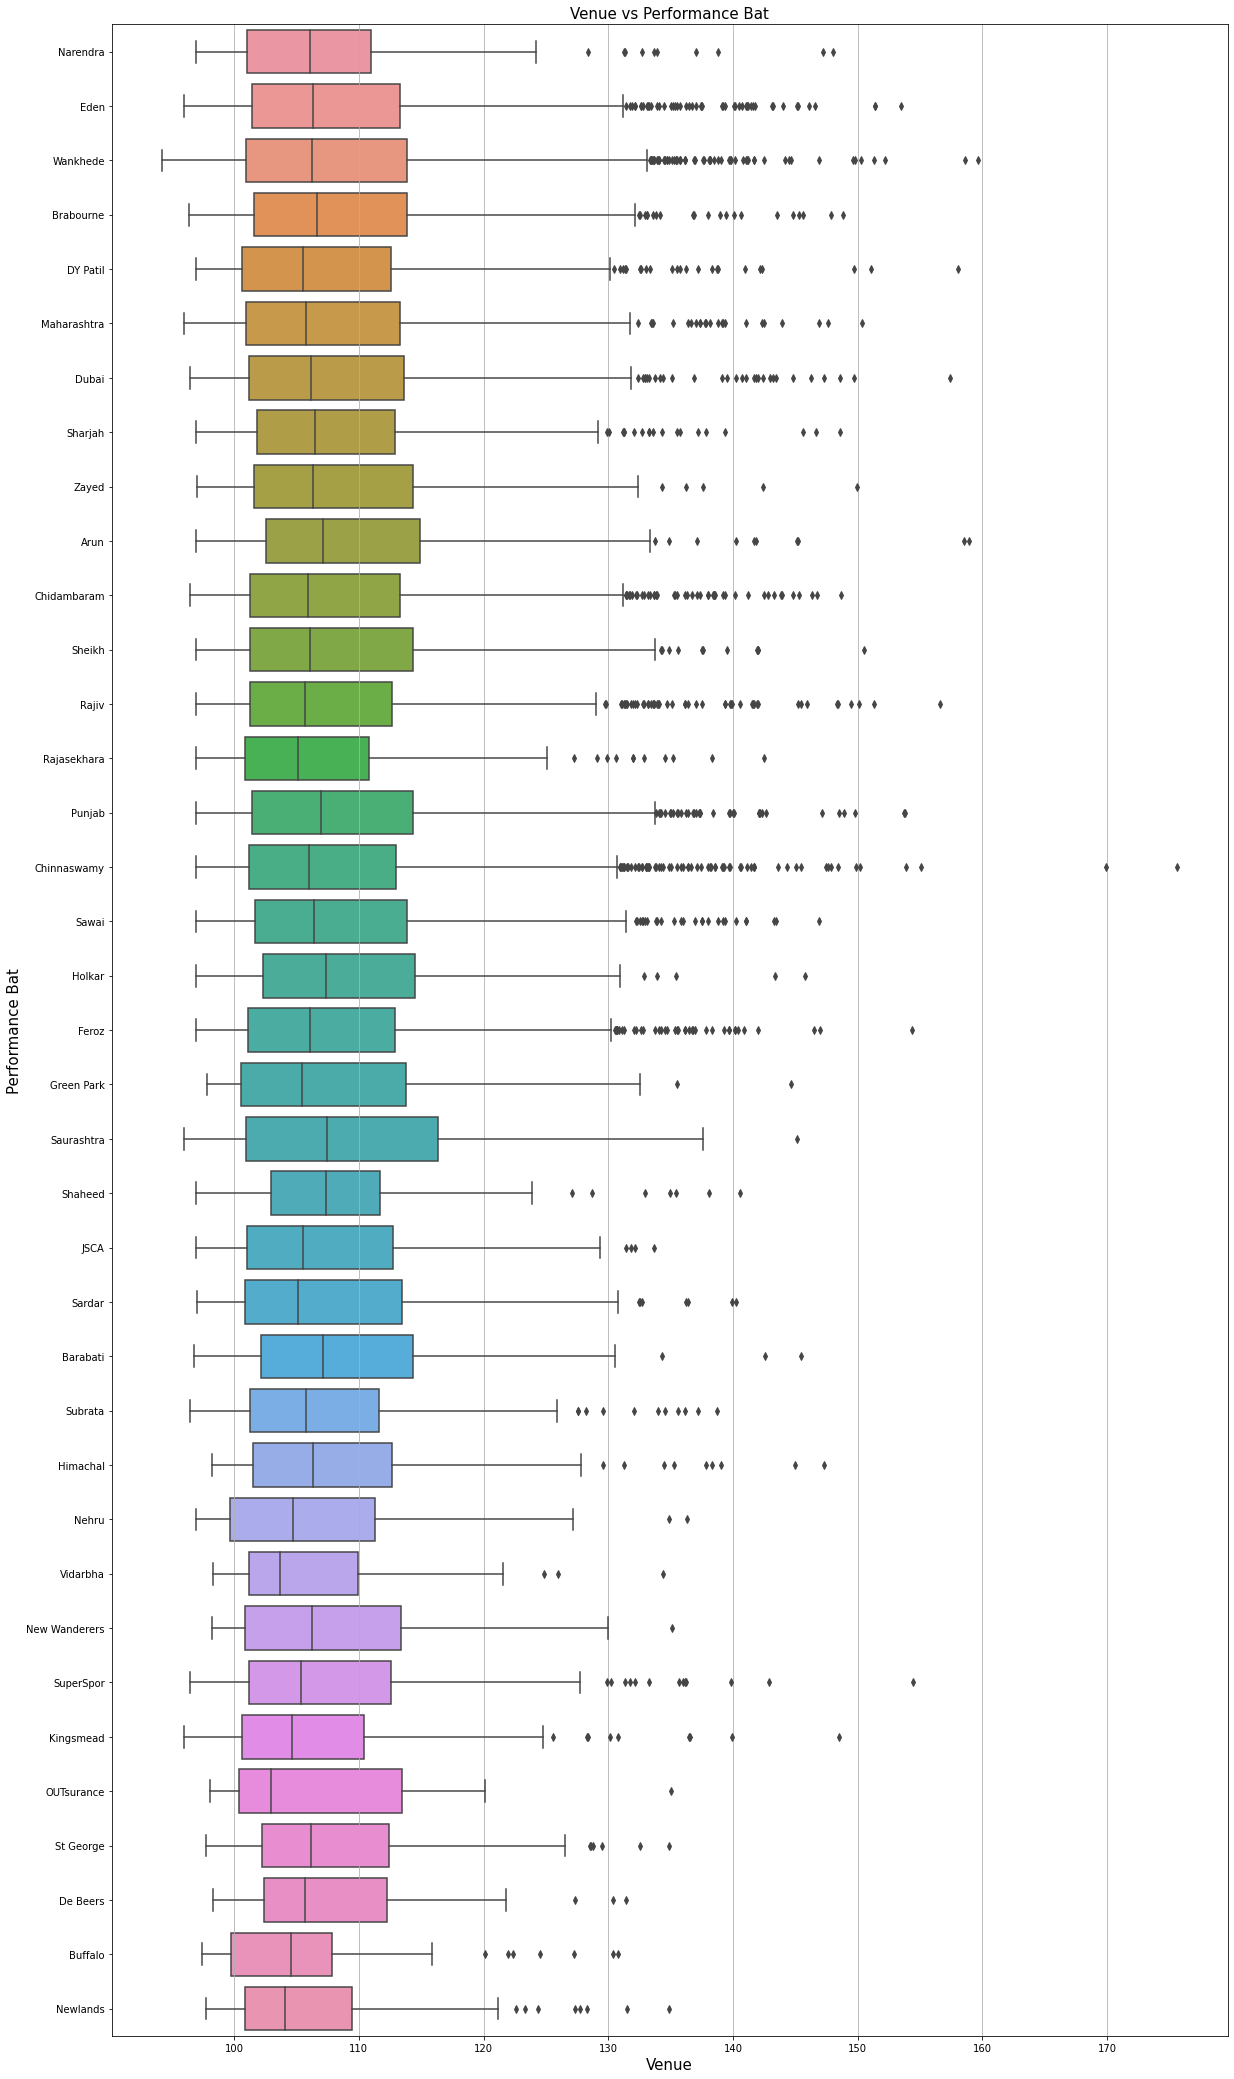

In [64]:
# draw the boxplot for OverallQuality and the Property_Sale_Price
fig, ax = plt.subplots(figsize=(20, 37))
sns.boxplot(x="Performance Bat", y="Venue", data= df)

# set the title of the plot and the fontsize
plt.title("Venue vs Performance Bat", fontsize=15)

# set the xlabel and the fontsize
plt.xlabel("Venue", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Performance Bat", fontsize=15)
ax.xaxis.grid(True)

# display the plot
plt.show()

In [65]:
df.shape

(14229, 26)

In [66]:
df["Venue"].unique()

array(['Narendra', 'Eden', 'Wankhede', 'Brabourne', 'DY Patil',
       'Maharashtra', 'Dubai', 'Sharjah', 'Zayed', 'Arun', 'Chidambaram',
       'Sheikh', 'Rajiv', 'Rajasekhara', 'Punjab', 'Chinnaswamy', 'Sawai',
       'Holkar', 'Feroz', 'Green Park', 'Saurashtra', 'Shaheed', 'JSCA',
       'Sardar', 'Barabati', 'Subrata', 'Himachal', 'Nehru', 'Vidarbha',
       'New Wanderers', 'SuperSpor', 'Kingsmead', 'OUTsurance',
       'St George', 'De Beers', 'Buffalo', 'Newlands'], dtype=object)

In [67]:
for i in df["Venue"].unique():
    Q1,Q3 = df[df["Venue"]==str(i)]["Performance Bat"].quantile([0.25,0.75])  
    IQR = Q3 - Q1
    up_lim = Q3 + 3 * IQR 
    index = df[ (df['Venue'] == str(i)) & (df["Performance Bat"] > up_lim) ].index
    df.drop(index , inplace=True)
    

In [68]:
df=df.reset_index(drop=True)

In [69]:
df.shape

(14192, 26)

**Handling Outliers with respect to Type**

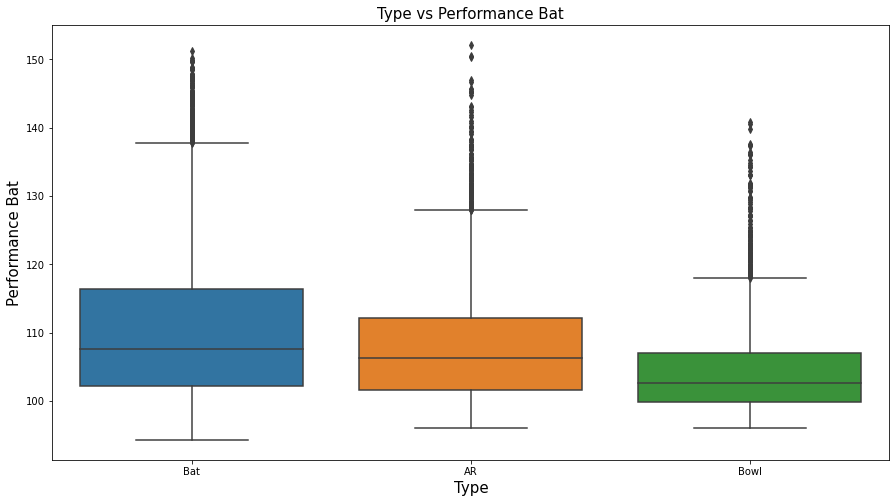

In [70]:
# draw the boxplot for OverallQuality and the Property_Sale_Price
sns.boxplot(y="Performance Bat", x="Type", data= df)

# set the title of the plot and the fontsize
plt.title("Type vs Performance Bat", fontsize=15)

# set the xlabel and the fontsize
plt.xlabel("Type", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Performance Bat", fontsize=15)

# display the plot
plt.show()

In [71]:
df.Type.unique()

array(['Bat', 'AR', 'Bowl'], dtype=object)

In [72]:
for i in df["Type"].unique():
    Q1,Q3 = df[df["Type"]==str(i)]["Performance Bat"].quantile([0.25,0.75])  
    IQR = Q3 - Q1
    up_lim = Q3 + 3 * IQR 
    index = df[ (df['Type'] == str(i)) & (df["Performance Bat"] > up_lim) ].index
    df.drop(index , inplace=True)
    

In [73]:
df=df.reset_index(drop=True)

In [74]:
df.shape

(14147, 26)

**Handling Outliers with respect to Bat Style**

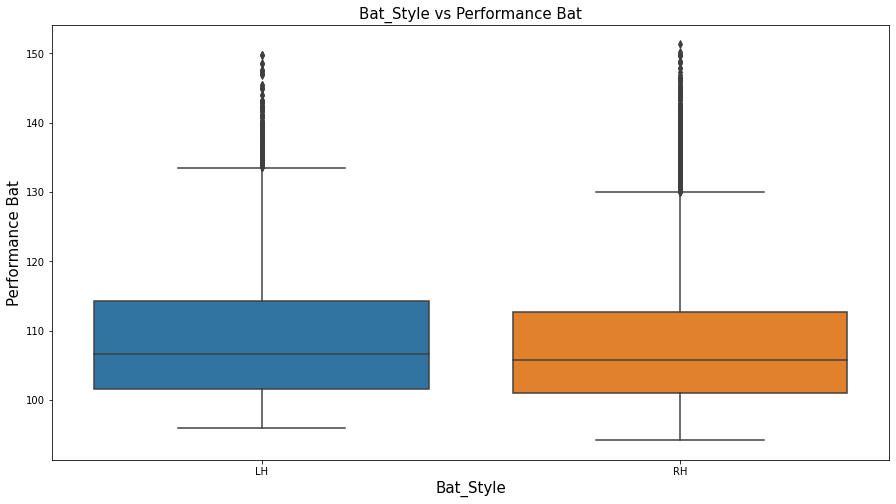

In [75]:
# draw the boxplot for OverallQuality and the Property_Sale_Price
sns.boxplot(y="Performance Bat", x="Bat_Style", data= df)

# set the title of the plot and the fontsize
plt.title("Bat_Style vs Performance Bat", fontsize=15)

# set the xlabel and the fontsize
plt.xlabel("Bat_Style", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Performance Bat", fontsize=15)

# display the plot
plt.show()

In [76]:
df.Bat_Style.unique()

array(['LH', 'RH'], dtype=object)

In [77]:
for i in df["Bat_Style"].unique():
    Q1,Q3 = df[df["Bat_Style"]==str(i)]["Performance Bat"].quantile([0.25,0.75])  
    IQR = Q3 - Q1
    up_lim = Q3 + 3 * IQR 
    index = df[ (df['Bat_Style'] == str(i)) & (df["Performance Bat"] > up_lim) ].index
    df.drop(index , inplace=True)
    

In [78]:
df=df.reset_index(drop=True)

In [79]:
df.shape

(14136, 26)

**Handling Outliers with respect to Team**

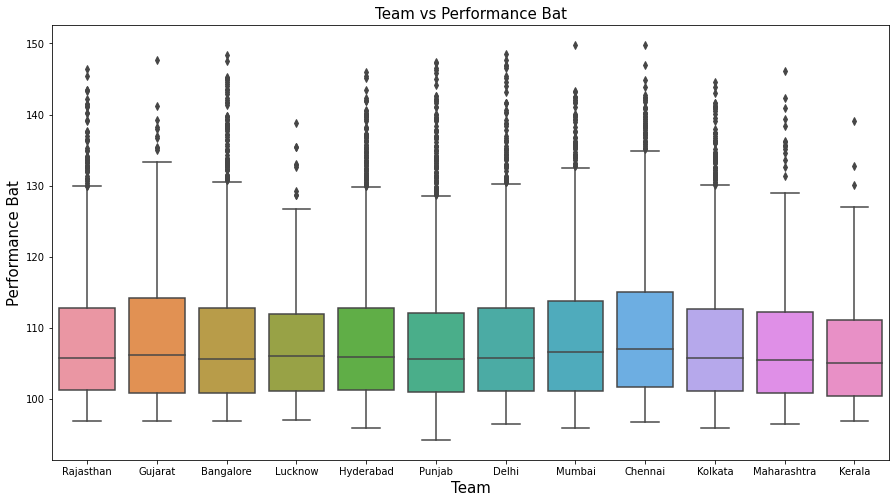

In [80]:
# draw the boxplot for OverallQuality and the Property_Sale_Price
sns.boxplot(y="Performance Bat", x="Team", data= df)

# set the title of the plot and the fontsize
plt.title("Team vs Performance Bat", fontsize=15)

# set the xlabel and the fontsize
plt.xlabel("Team", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Performance Bat", fontsize=15)

# display the plot
plt.show()

In [81]:
df.Team.unique()

array(['Rajasthan', 'Gujarat', 'Bangalore', 'Lucknow', 'Hyderabad',
       'Punjab', 'Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Maharashtra',
       'Kerala'], dtype=object)

In [82]:
for i in df["Team"].unique():
    Q1,Q3 = df[df["Team"]==str(i)]["Performance Bat"].quantile([0.25,0.75])  
    IQR = Q3 - Q1
    up_lim = Q3 + 3 * IQR 
    index = df[ (df['Team'] == str(i)) & (df["Performance Bat"] > up_lim) ].index
    df.drop(index , inplace=True)
    


In [83]:
df=df.reset_index(drop=True)

In [84]:
df.shape

(14129, 26)

**Handling Outliers with respect to Opp Team**

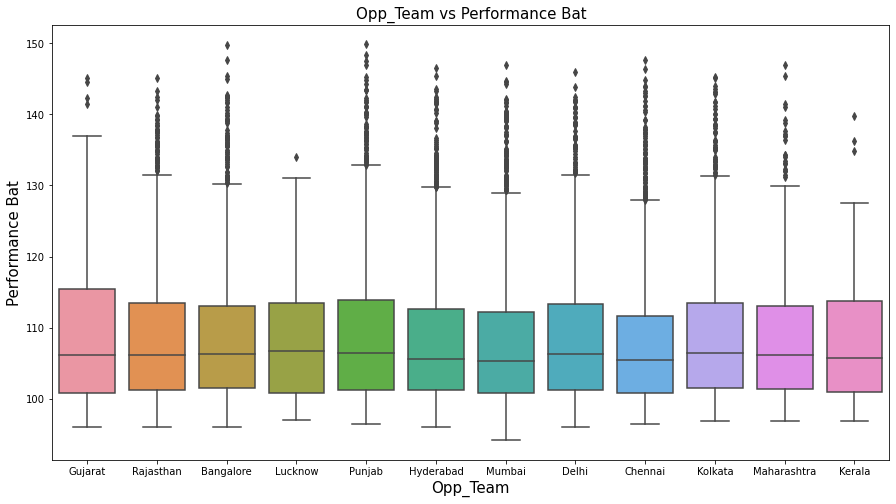

In [85]:
# draw the boxplot for OverallQuality and the Property_Sale_Price
sns.boxplot(y="Performance Bat", x="Opp_Team", data= df)

# set the title of the plot and the fontsize
plt.title("Opp_Team vs Performance Bat", fontsize=15)

# set the xlabel and the fontsize
plt.xlabel("Opp_Team", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Performance Bat", fontsize=15)

# display the plot
plt.show()

In [86]:
df.Opp_Team.unique()

array(['Gujarat', 'Rajasthan', 'Bangalore', 'Lucknow', 'Punjab',
       'Hyderabad', 'Mumbai', 'Delhi', 'Chennai', 'Kolkata',
       'Maharashtra', 'Kerala'], dtype=object)

In [87]:
for i in df["Opp_Team"].unique():
    Q1,Q3 = df[df["Opp_Team"]==str(i)]["Performance Bat"].quantile([0.25,0.75])  
    IQR = Q3 - Q1
    up_lim = Q3 + 3 * IQR 
    index = df[ (df['Opp_Team'] == str(i)) & (df["Performance Bat"] > up_lim) ].index
    df.drop(index , inplace=True)
    


In [88]:
df=df.reset_index(drop=True)

In [89]:
df.shape

(14123, 26)

## 4.5 Study Correlation

In [90]:
df.columns

Index(['innings', 'Team', 'Performance Bat', 'Venue', 'Position1', 'Position2',
       'Position3', 'Position4', 'Position5', 'Position6', 'Position7',
       'Position8', 'Position9', 'Position10', 'Position11', 'Opp_Team',
       'Bat Start', 'Bowler1', 'Bowler2', 'Bowler3', 'Bowler4', 'Bowler5',
       'Bowler6', 'Bowler7', 'Type', 'Bat_Style'],
      dtype='object')

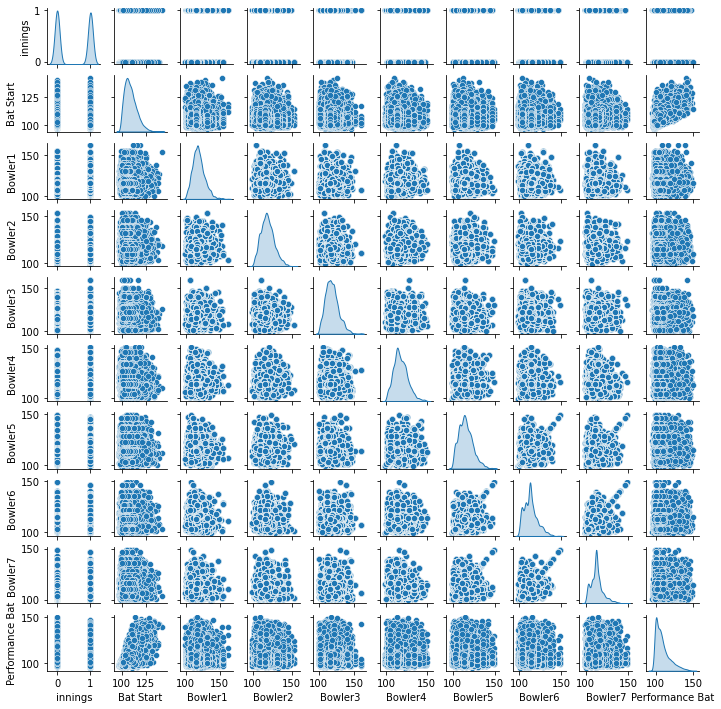

In [91]:
# Pairplot of numeric variables

# select the columns for the pairplot
columns= ["Venue", "innings", "Bat Start", "Type", "Bat_Style", "Team","Opp_Team","Bowler1","Bowler2",
         "Bowler3","Bowler4","Bowler5","Bowler6","Bowler7","Performance Bat"]

# draw the pairplot such that the diagonal should be density plot and the other graphs should be scatter plot
sns.pairplot(df[columns], size=1, kind= "scatter", diag_kind="kde")

# display the plot
plt.show()

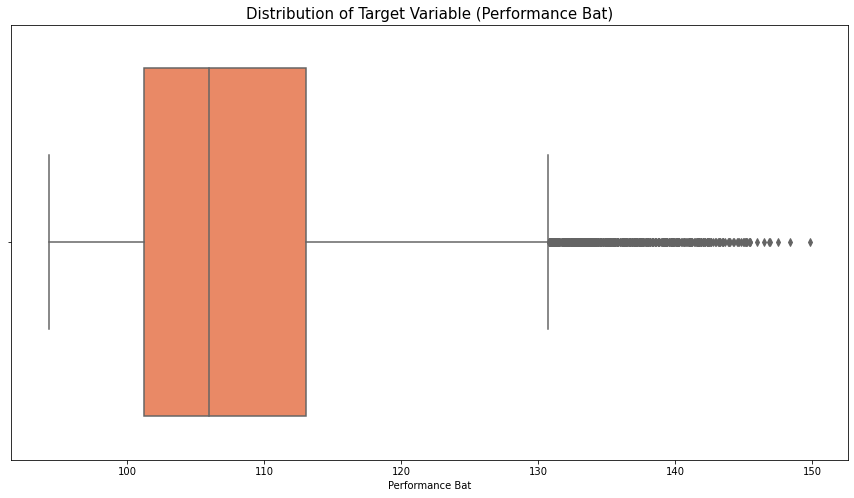

In [92]:
# plot a boxplot of target variable to detect the outliers
sns.boxplot(df['Performance Bat'], color='coral')

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Performance Bat)', fontsize = 15)

# display the plot
plt.show()

In [93]:
df["Performance Bat"].max()

149.8121468926554

In [94]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    

# add the column containing data type of each variable
missing_data['Type'] = df[missing_data.index].dtypes
missing_data

Total  Percentage of Missing Values     Type
innings              0                           0.0    int64
Team                 0                           0.0   object
Type                 0                           0.0   object
Bowler7              0                           0.0  float64
Bowler6              0                           0.0  float64
Bowler5              0                           0.0  float64
Bowler4              0                           0.0  float64
Bowler3              0                           0.0  float64
Bowler2              0                           0.0  float64
Bowler1              0                           0.0  float64
Bat Start            0                           0.0  float64
Opp_Team             0                           0.0   object
Position11           0                           0.0    int32
Position10           0                           0.0    int32
Position9            0                           0.0    int32
Position8            0                           0.0    int32
Position7            0                           0.0    int32
Position6            0                           0.0    int32
Position5            0                           0.0    int32
Position4            0                           0.0    int32
Position3            0                           0.0    int32
Position2            0                           0.0    int32
Position1            0                           0.0    int32
Venue                0                           0.0   object
Performance Bat      0                           0.0  float64
Bat_Style            0                           0.0   object

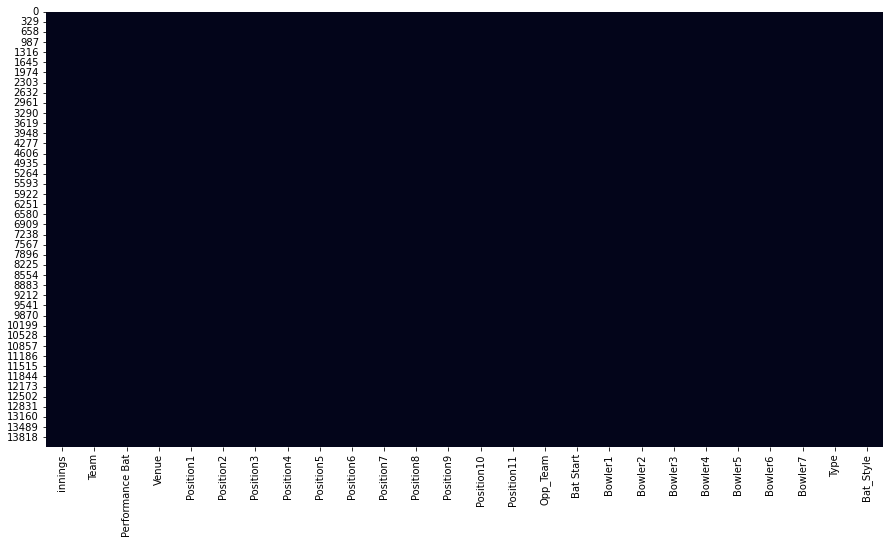

In [95]:
# plot heatmap to visualize the null values in each column
# 'cbar = False' does not show the color axis 
sns.heatmap(df.isnull(), cbar=False)

# display the plot
plt.show()

In [96]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = df.corr()

# print the correlation matrix
corrmat

innings  Performance Bat  Position1  Position2  Position3  \
innings          1.000000        -0.025979   0.010503   0.006945   0.004602   
Performance Bat -0.025979         1.000000   0.070815   0.097327   0.088574   
Position1        0.010503         0.070815   1.000000  -0.152193  -0.151487   
Position2        0.006945         0.097327  -0.152193   1.000000  -0.151440   
Position3        0.004602         0.088574  -0.151487  -0.151440   1.000000   
Position4       -0.003353         0.080764  -0.149549  -0.149503  -0.148809   
Position5       -0.015962         0.037619  -0.144963  -0.144918  -0.144246   
Position6       -0.019501        -0.028535  -0.135253  -0.135211  -0.134584   
Position7       -0.016720        -0.074722  -0.120353  -0.120316  -0.119758   
Position8       -0.007878        -0.121223  -0.104248  -0.104216  -0.103732   
Position9        0.012435        -0.138353  -0.086733  -0.086706  -0.086304   
Position10       0.023391        -0.129535  -0.069391  -0.069370  -0.069048   
Position11       0.038095        -0.111191  -0.051192  -0.051177  -0.050939   
Bat Start       -0.024193         0.622072   0.139336   0.133385   0.134214   
Bowler1         -0.008959        -0.062747  -0.022994  -0.022149  -0.022411   
Bowler2          0.015978        -0.058464  -0.021167  -0.022577  -0.019666   
Bowler3         -0.001531        -0.061591  -0.020316  -0.021298  -0.019063   
Bowler4          0.056104        -0.055926  -0.020922  -0.022955  -0.017945   
Bowler5         -0.012269        -0.072926  -0.024422  -0.024009  -0.025731   
Bowler6          0.009046        -0.049898  -0.015062  -0.013941  -0.016484   
Bowler7          0.005537        -0.034876  -0.010124  -0.010037  -0.010285   

                 Position4  Position5  Position6  Position7  Position8  \
innings          -0.003353  -0.015962  -0.019501  -0.016720  -0.007878   
Performance Bat   0.080764   0.037619  -0.028535  -0.074722  -0.121223   
Position1        -0.149549  -0.144963  -0.135253  -0.120353  -0.104248   
Position2        -0.149503  -0.144918  -0.135211  -0.120316  -0.104216   
Position3        -0.148809  -0.144246  -0.134584  -0.119758  -0.103732   
Position4         1.000000  -0.142401  -0.132863  -0.118226  -0.102406   
Position5        -0.142401   1.000000  -0.128788  -0.114601  -0.099265   
Position6        -0.132863  -0.128788   1.000000  -0.106925  -0.092616   
Position7        -0.118226  -0.114601  -0.106925   1.000000  -0.082414   
Position8        -0.102406  -0.099265  -0.092616  -0.082414   1.000000   
Position9        -0.085200  -0.082587  -0.077056  -0.068567  -0.059392   
Position10       -0.068165  -0.066075  -0.061649  -0.054858  -0.047517   
Position11       -0.050288  -0.048745  -0.045480  -0.040470  -0.035055   
Bat Start         0.137363   0.040266  -0.049206  -0.110490  -0.186475   
Bowler1          -0.017629  -0.008622   0.003231   0.014816   0.028388   
Bowler2          -0.014973  -0.009466   0.004701   0.018747   0.029841   
Bowler3          -0.014121  -0.006103   0.000426   0.020819   0.022965   
Bowler4          -0.014851  -0.007245   0.002092   0.016849   0.024649   
Bowler5          -0.018244  -0.008759   0.003521   0.016672   0.030532   
Bowler6          -0.011630  -0.005282   0.002388   0.007772   0.019729   
Bowler7          -0.007605   0.000042   0.005156   0.008214   0.005642   

                 Position9  Position10  Position11  Bat Start   Bowler1  \
innings           0.012435    0.023391    0.038095  -0.024193 -0.008959   
Performance Bat  -0.138353   -0.129535   -0.111191   0.622072 -0.062747   
Position1        -0.086733   -0.069391   -0.051192   0.139336 -0.022994   
Position2        -0.086706   -0.069370   -0.051177   0.133385 -0.022149   
Position3        -0.086304   -0.069048   -0.050939   0.134214 -0.022411   
Position4        -0.085200   -0.068165   -0.050288   0.137363 -0.017629   
Position5        -0.082587   -0.066075   -0.048745   0.040266 -0.008622   
Position6        -0.077056   -0.061649   -0.045480

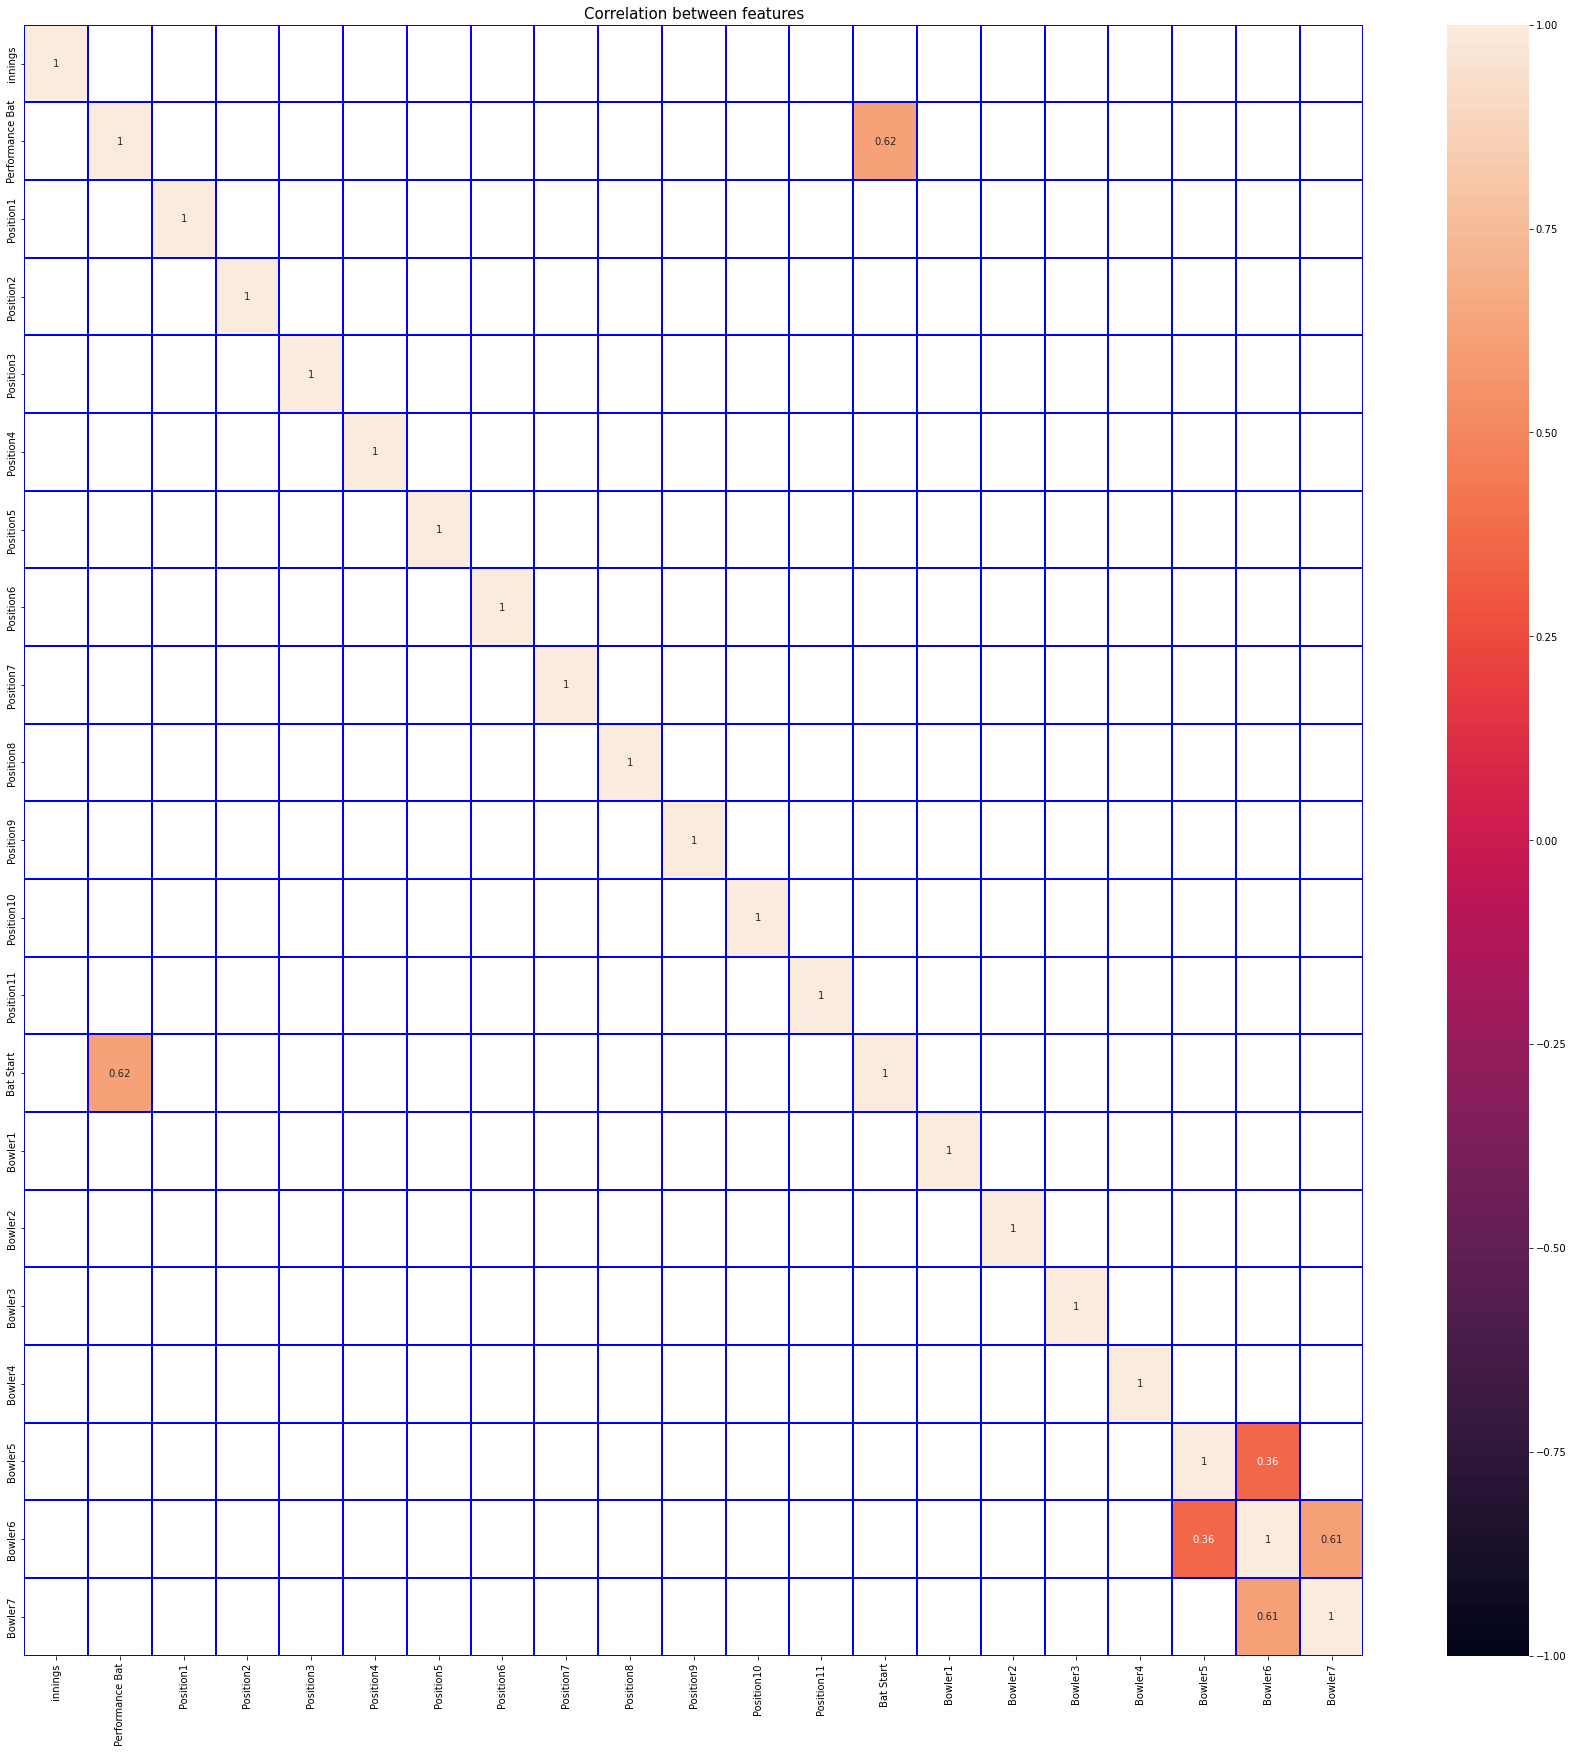

In [97]:
correlation=df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation[(correlation >= 0.3) | (correlation <= -0.3)],
            annot=True,linewidths=.1,linecolor="blue",vmax = 1, vmin = -1)
plt.title('Correlation between features', fontsize=15)
plt.show()

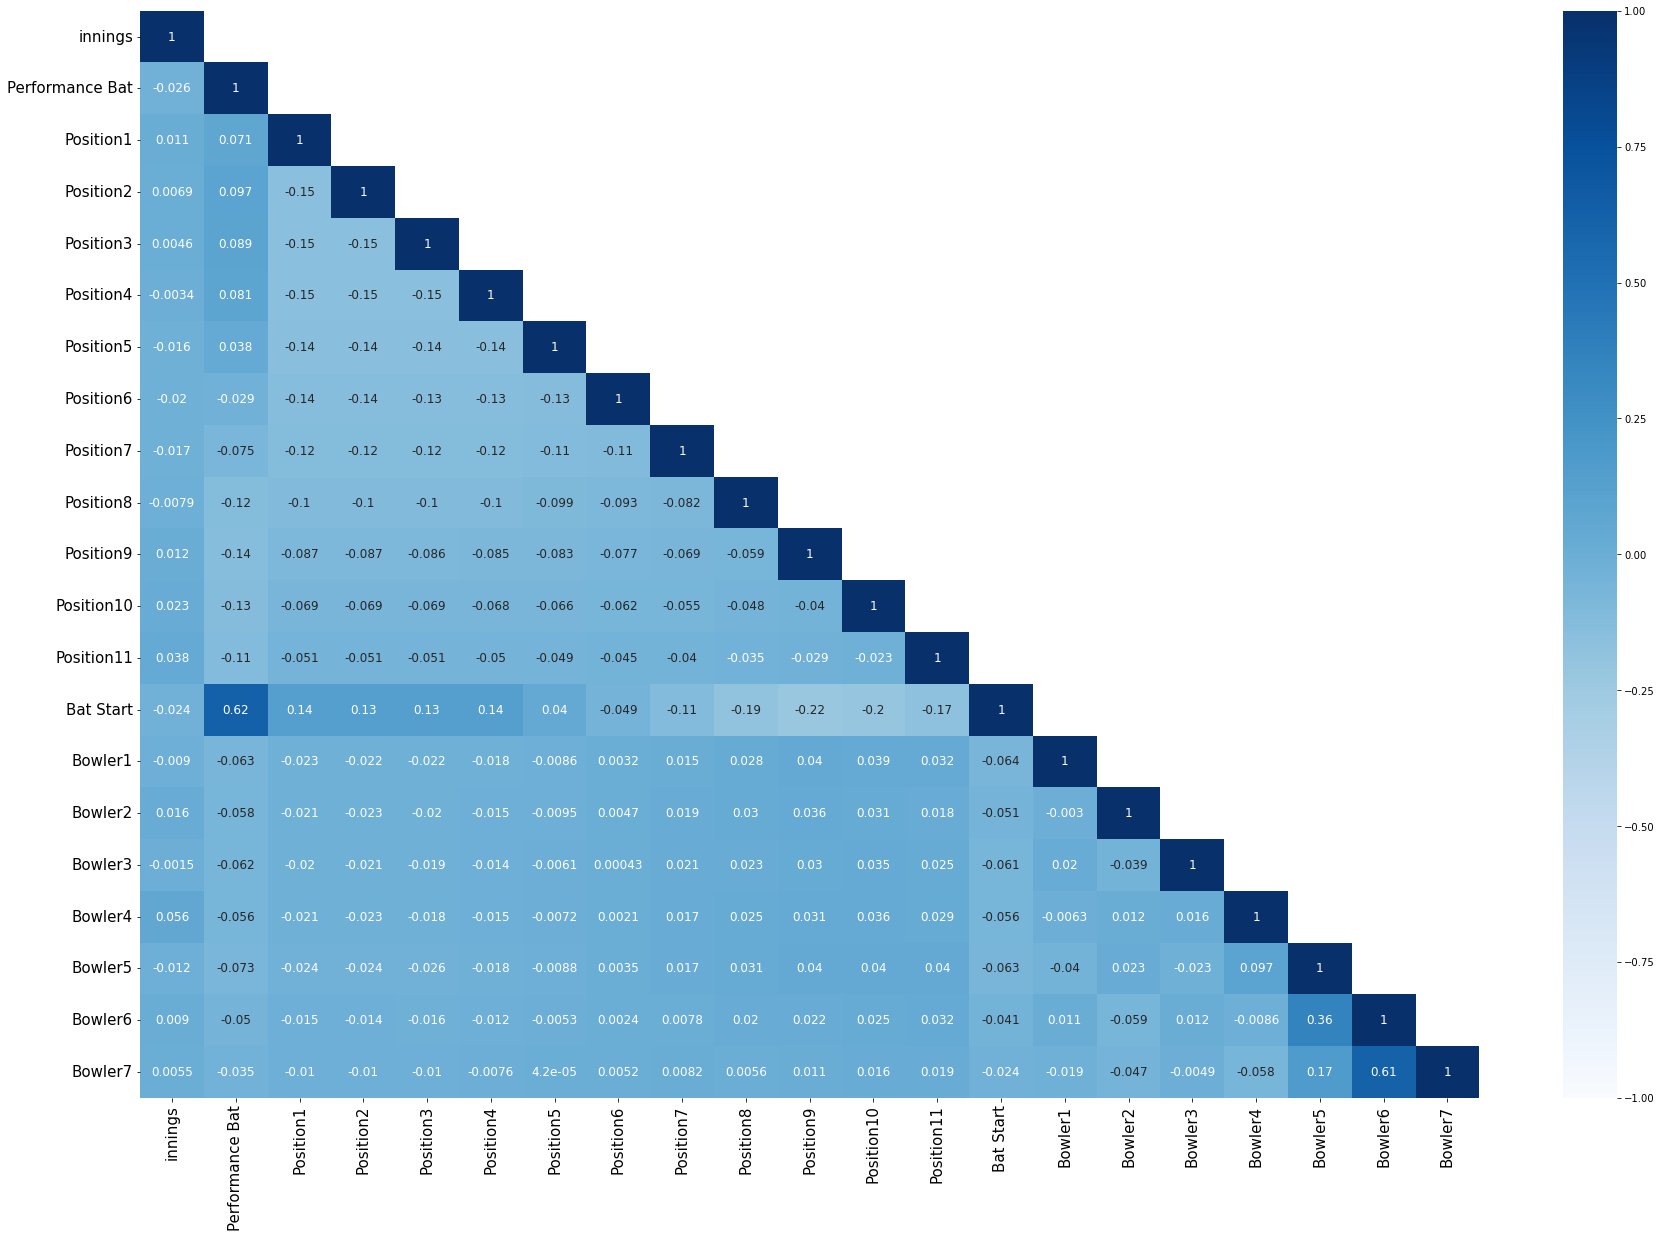

In [98]:
# set the plot size
# pass the required height and width to the parameter, 'figsize'  
plt.figure(figsize = (30,20))

# use 'mask' to plot a upper triangular correlation matrix 
# 'tril_indices_from' returns the indices for the lower-triangle of matrix
# 'k = -1' consider the diagonal of the matrix
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k = 1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corrmat, cmap = 'Blues', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)

# set the size of x and y axes labels
# set text size using 'fontsize'
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

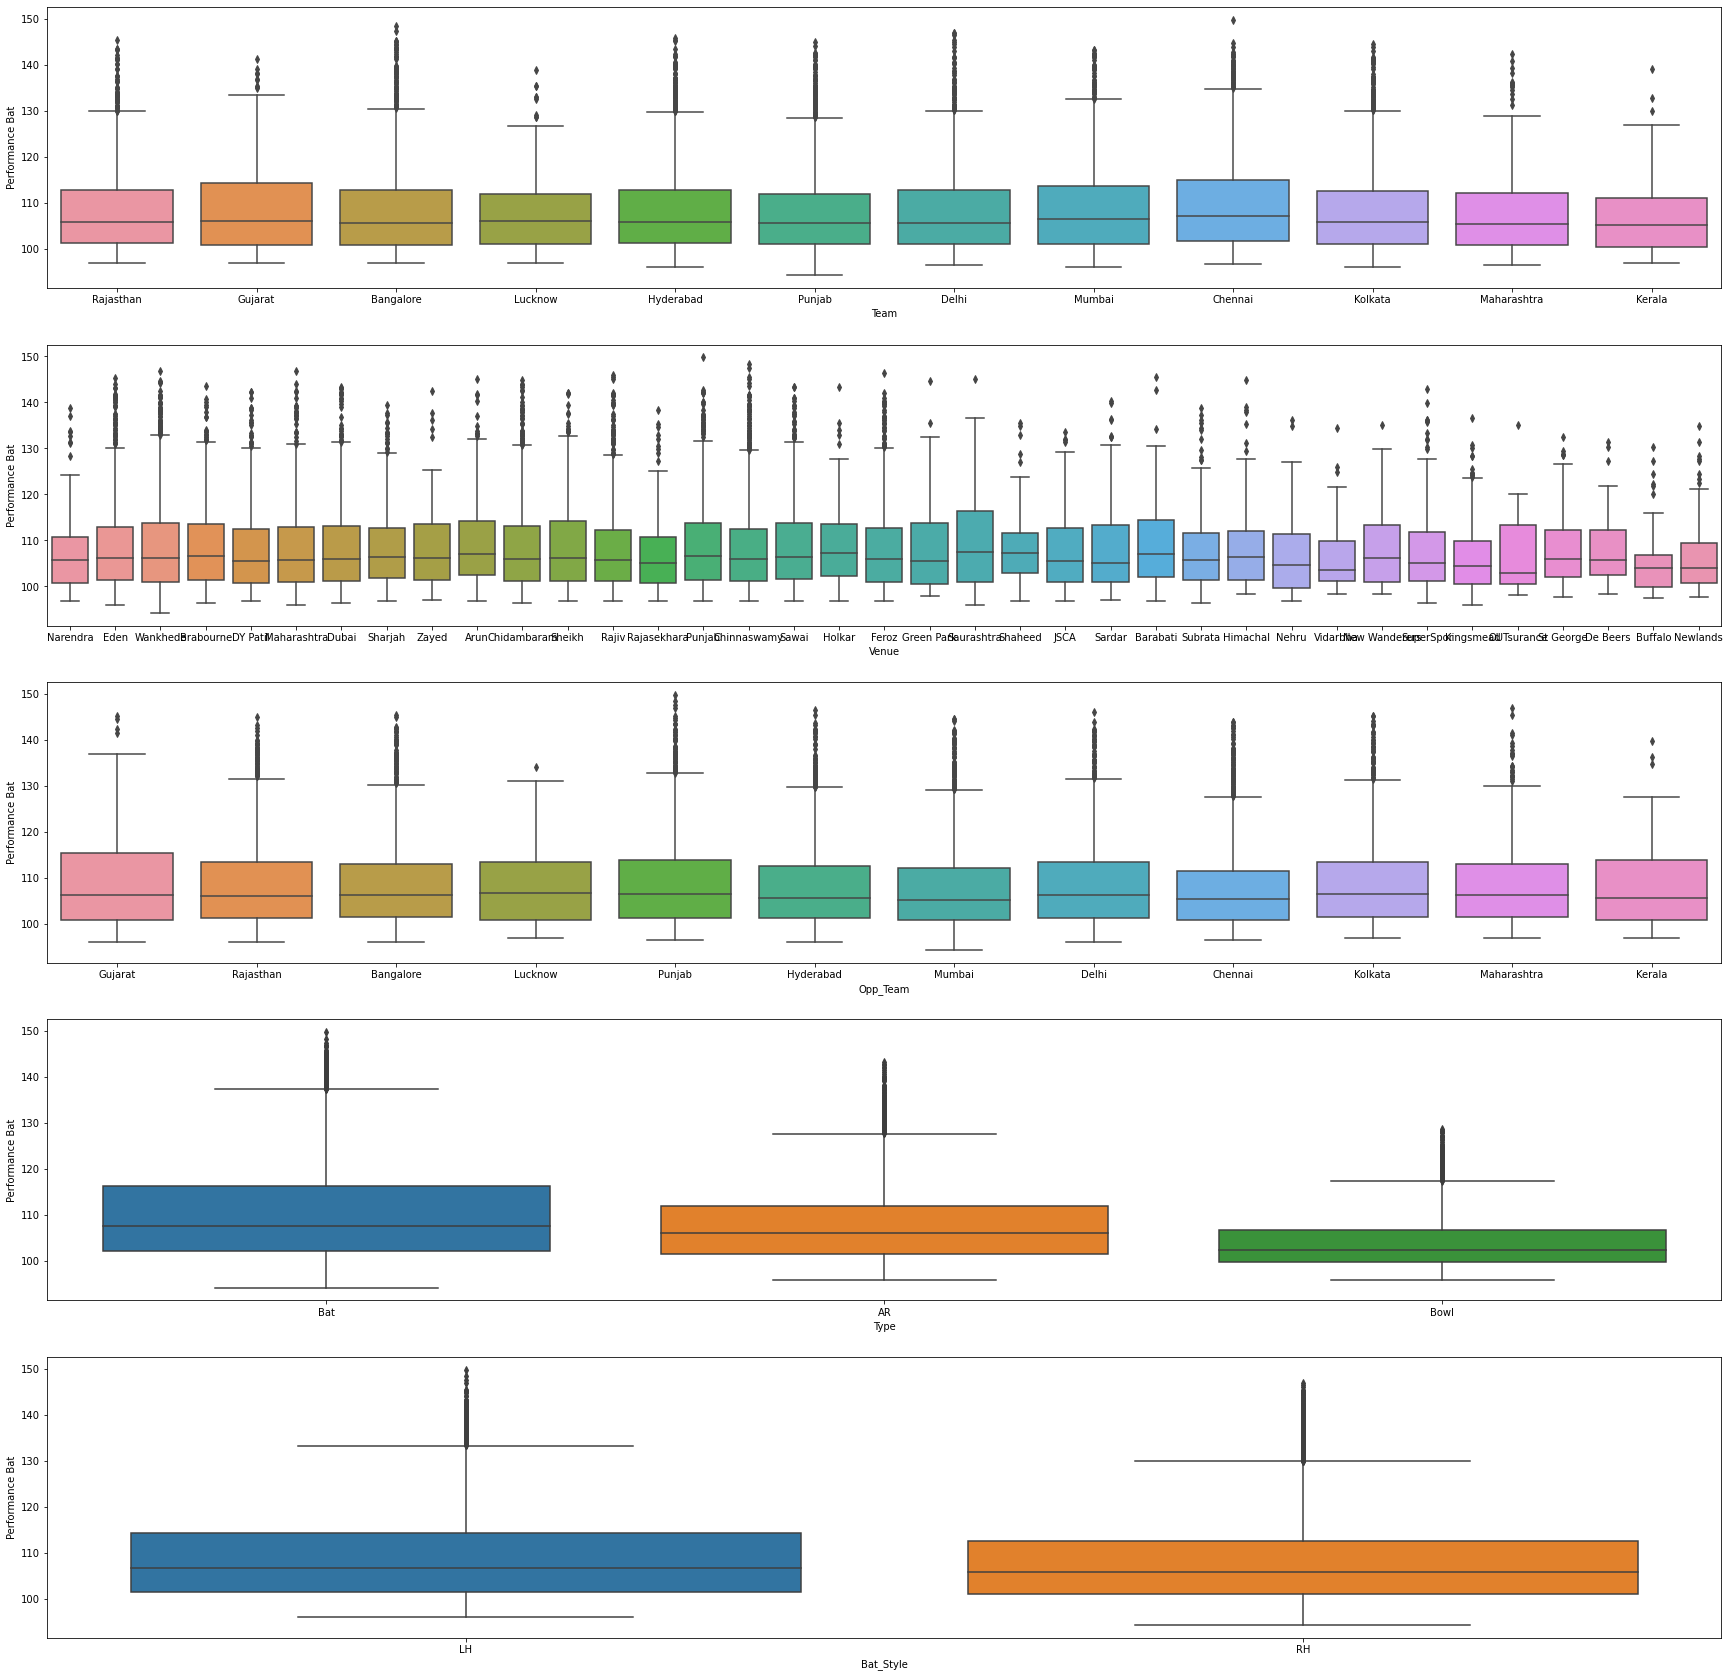

In [99]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in df:
    
    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

# plot the boxplot for each categorical and target variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize = (30, 30))

# use for loop to plot the boxplot for each categoric and target variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(x = variable, y = 'Performance Bat', data = df, ax = subplot)
    
# display the plot
plt.show()

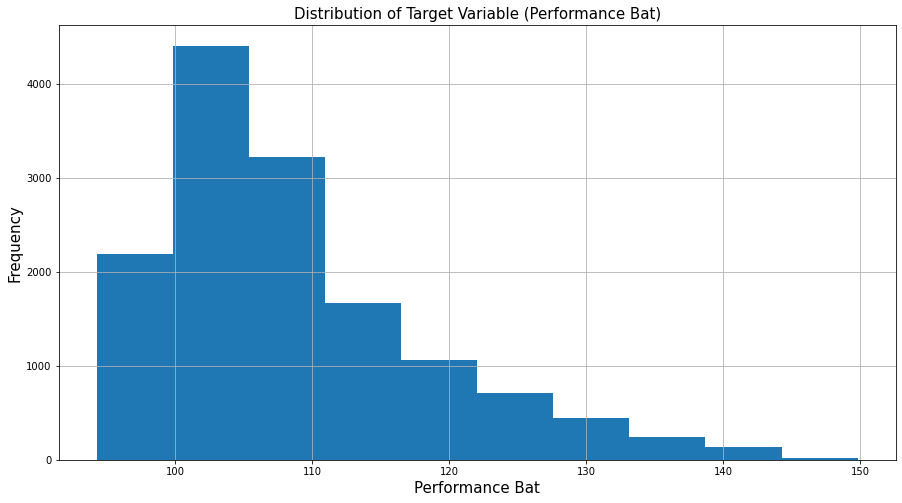

In [100]:
# check the distribution of target variable
df["Performance Bat"].hist()

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Performance Bat)', fontsize = 15)
plt.xlabel('Performance Bat', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [101]:
# normality test using jarque_bera()
# the test returns the the test statistics and the p-value of the test
stat, p = jarque_bera(df["Performance Bat"])

# to print the numeric outputs of the jarque_bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=4786.263, p-value=0.000
The data is not normally distributed (reject H0)


In [102]:
# log transformation for normality using np.log()
df['log Performance Bat'] = np.log(df['Performance Bat'])

# display first 5 rows of the data
df.head()

innings       Team  Performance Bat     Venue  Position1  Position2  \
0        0  Rajasthan       108.976497  Narendra          1          0   
1        0  Rajasthan       116.024011  Narendra          0          1   
2        0  Rajasthan       102.132776  Narendra          0          0   
3        0  Rajasthan        99.180791  Narendra          0          0   
4        0  Rajasthan       106.066403  Narendra          0          0   

   Position3  Position4  Position5  Position6  Position7  Position8  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          1          0          0          0          0          0   
3          0          1          0          0          0          0   
4          0          0          1          0          0          0   

   Position9  Position10  Position11 Opp_Team   Bat Start     Bowler1  \
0          0           0           0  Gujarat  105.176514  110.510876   
1          0           0           0  Gujarat  135.156780  110.510876   
2          0           0           0  Gujarat  110.161804  110.510876   
3          0           0           0  Gujarat  105.806968  110.510876   
4          0           0           0  Gujarat  102.345436  110.510876   

      Bowler2     Bowler3     Bowler4     Bowler5     Bowler6     Bowler7  \
0  111.707792  109.647523  114.554365  119.865873  127.045503  127.045503   
1  111.707792  109.647523  114.554365  119.865873  127.045503  127.045503   
2  111.707792  109.647523  114.554365  119.865873  127.045503  127.045503   
3  111.707792  109.647523  114.554365  119.865873  127.045503  127.045503   
4  111.707792  109.647523  114.554365  119.865873  127.045503  127.045503   

  Type Bat_Style  log Performance Bat  
0  Bat        LH             4.691132  
1  Bat        RH             4.753797  
2  Bat        RH             4.626274  
3  Bat        LH             4.596944  
4  Bat        LH             4.664065

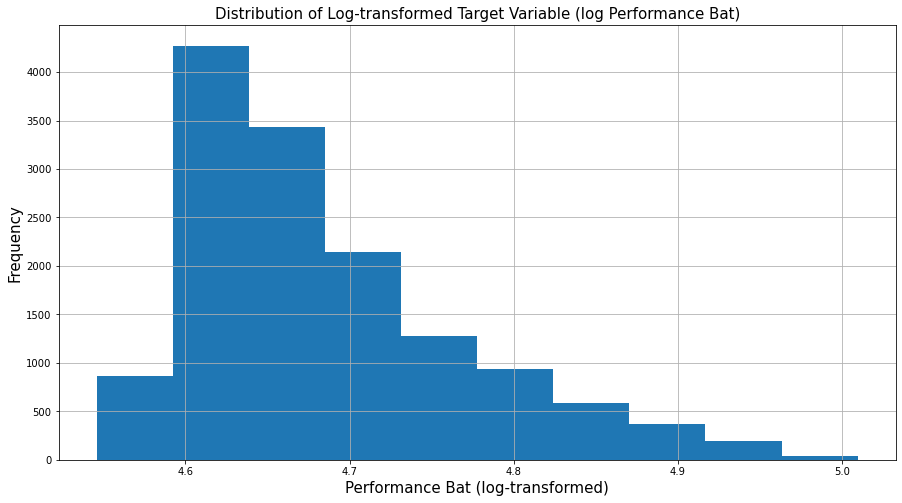

In [103]:
# recheck for normality 
# plot the histogram using hist
df["log Performance Bat"].hist()

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Log-transformed Target Variable (log Performance Bat)', fontsize = 15)
plt.xlabel('Performance Bat (log-transformed)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [104]:
# check the normality by jarque_bera test
# the test returns the the test statistics and the p-value of the test
stat, pv = jarque_bera(df['log Performance Bat'])

# to print the numeric outputs of the jarque_bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, pv))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if pv > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=3011.672, p-value=0.000
The data is not normally distributed (reject H0)


## 4.6 Feature Scaling

Here we can do the following:

1.One-Hot Encoding

2.Normalization using minmaxscaler()

In [105]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df[['Bat Start','Bowler1', 'Bowler2', 'Bowler3', 'Bowler4', 'Bowler5', 'Bowler6','Bowler7']]
df_target=df[['Performance Bat','log Performance Bat']]
df_nominal_features=df[['innings','Position1','Position2', 'Position3', 'Position4', 'Position5', 'Position6',
       'Position7', 'Position8', 'Position9', 'Position10', 'Position11',]]

# display the numeric features
print(df_numeric_features.columns)
df_nominal_features.columns

Index(['Bat Start', 'Bowler1', 'Bowler2', 'Bowler3', 'Bowler4', 'Bowler5',
       'Bowler6', 'Bowler7'],
      dtype='object')


Index(['innings', 'Position1', 'Position2', 'Position3', 'Position4',
       'Position5', 'Position6', 'Position7', 'Position8', 'Position9',
       'Position10', 'Position11'],
      dtype='object')

In [106]:
# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features
df_categoric_features = df.select_dtypes(include = object)

# display categorical features
df_categoric_features.columns

Index(['Team', 'Venue', 'Opp_Team', 'Type', 'Bat_Style'], dtype='object')

### 4.6.1 One Hot Encoding

In [107]:
df_Encode = OneHotEncoder(df_categoric_features.columns
                           ,use_cat_names=True)
hot = df_Encode.fit_transform(df_categoric_features)

In [108]:
hot.columns

Index(['Team_Rajasthan', 'Team_Gujarat', 'Team_Bangalore', 'Team_Lucknow',
       'Team_Hyderabad', 'Team_Punjab', 'Team_Delhi', 'Team_Mumbai',
       'Team_Chennai', 'Team_Kolkata', 'Team_Maharashtra', 'Team_Kerala',
       'Venue_Narendra', 'Venue_Eden', 'Venue_Wankhede', 'Venue_Brabourne',
       'Venue_DY Patil', 'Venue_Maharashtra', 'Venue_Dubai', 'Venue_Sharjah',
       'Venue_Zayed', 'Venue_Arun', 'Venue_Chidambaram', 'Venue_Sheikh',
       'Venue_Rajiv', 'Venue_Rajasekhara', 'Venue_Punjab', 'Venue_Chinnaswamy',
       'Venue_Sawai', 'Venue_Holkar', 'Venue_Feroz', 'Venue_Green Park',
       'Venue_Saurashtra', 'Venue_Shaheed', 'Venue_JSCA', 'Venue_Sardar',
       'Venue_Barabati', 'Venue_Subrata', 'Venue_Himachal', 'Venue_Nehru',
       'Venue_Vidarbha', 'Venue_New Wanderers', 'Venue_SuperSpor',
       'Venue_Kingsmead', 'Venue_OUTsurance', 'Venue_St George',
       'Venue_De Beers', 'Venue_Buffalo', 'Venue_Newlands', 'Opp_Team_Gujarat',
       'Opp_Team_Rajasthan', 'Opp_Team_Ba

In [109]:
df_One_hot=hot.drop(['Venue_Chinnaswamy','Type_AR','Bat_Style_RH','Team_Kolkata','Opp_Team_Bangalore'],axis=1)

In [110]:
df_One_hot.columns

Index(['Team_Rajasthan', 'Team_Gujarat', 'Team_Bangalore', 'Team_Lucknow',
       'Team_Hyderabad', 'Team_Punjab', 'Team_Delhi', 'Team_Mumbai',
       'Team_Chennai', 'Team_Maharashtra', 'Team_Kerala', 'Venue_Narendra',
       'Venue_Eden', 'Venue_Wankhede', 'Venue_Brabourne', 'Venue_DY Patil',
       'Venue_Maharashtra', 'Venue_Dubai', 'Venue_Sharjah', 'Venue_Zayed',
       'Venue_Arun', 'Venue_Chidambaram', 'Venue_Sheikh', 'Venue_Rajiv',
       'Venue_Rajasekhara', 'Venue_Punjab', 'Venue_Sawai', 'Venue_Holkar',
       'Venue_Feroz', 'Venue_Green Park', 'Venue_Saurashtra', 'Venue_Shaheed',
       'Venue_JSCA', 'Venue_Sardar', 'Venue_Barabati', 'Venue_Subrata',
       'Venue_Himachal', 'Venue_Nehru', 'Venue_Vidarbha',
       'Venue_New Wanderers', 'Venue_SuperSpor', 'Venue_Kingsmead',
       'Venue_OUTsurance', 'Venue_St George', 'Venue_De Beers',
       'Venue_Buffalo', 'Venue_Newlands', 'Opp_Team_Gujarat',
       'Opp_Team_Rajasthan', 'Opp_Team_Lucknow', 'Opp_Team_Punjab',
       'Op

### 4.6.2 Normalization

In [111]:
df_numeric_features.columns

Index(['Bat Start', 'Bowler1', 'Bowler2', 'Bowler3', 'Bowler4', 'Bowler5',
       'Bowler6', 'Bowler7'],
      dtype='object')

In [112]:
minmax_scale = MinMaxScaler()
# fit on the train dataset
minmax_scale.fit((df_numeric_features))
# transform the train dataset columns ("Experience" and "Salary")
df_minmax = minmax_scale.transform(df_numeric_features)
print(type(df_minmax))
df_minmax_new = pd.DataFrame(df_minmax,columns=['Bat Start', 'Bowler1', 'Bowler2',
       'Bowler3', 'Bowler4', 'Bowler5', 'Bowler6', 'Bowler7'])
df_minmax_new

<class 'numpy.ndarray'>


Bat Start   Bowler1   Bowler2   Bowler3   Bowler4   Bowler5   Bowler6  \
0       0.185099  0.169063  0.225570  0.159393  0.298756  0.416187  0.561636   
1       0.858795  0.169063  0.225570  0.159393  0.298756  0.416187  0.561636   
2       0.297125  0.169063  0.225570  0.159393  0.298756  0.416187  0.561636   
3       0.199266  0.169063  0.225570  0.159393  0.298756  0.416187  0.561636   
4       0.121481  0.169063  0.225570  0.159393  0.298756  0.416187  0.561636   
5       0.296019  0.169063  0.225570  0.159393  0.298756  0.416187  0.561636   
6       0.182247  0.169063  0.225570  0.159393  0.298756  0.416187  0.561636   
7       0.208457  0.169063  0.225570  0.159393  0.298756  0.416187  0.561636   
8       0.210163  0.169063  0.225570  0.159393  0.298756  0.416187  0.561636   
9       0.127435  0.182197  0.400194  0.436009  0.346317  0.164736  0.167126   
10      0.331565  0.182197  0.400194  0.436009  0.346317  0.164736  0.167126   
11      0.276025  0.182197  0.400194  0.436009  0.346317  0.164736  0.167126   
12      0.501349  0.182197  0.400194  0.436009  0.346317  0.164736  0.167126   
13      0.611656  0.182197  0.400194  0.436009  0.346317  0.164736  0.167126   
14      0.353807  0.537315  0.249193  0.271186  0.304571  0.312237  0.267516   
15      0.305723  0.537315  0.249193  0.271186  0.304571  0.312237  0.267516   
16      0.789907  0.537315  0.249193  0.271186  0.304571  0.312237  0.267516   
17      0.294289  0.537315  0.249193  0.271186  0.304571  0.312237  0.267516   
18      0.183538  0.537315  0.249193  0.271186  0.304571  0.312237  0.267516   
19      0.253737  0.537315  0.249193  0.271186  0.304571  0.312237  0.267516   
20      0.129007  0.537315  0.249193  0.271186  0.304571  0.312237  0.267516   
21      0.062819  0.537315  0.249193  0.271186  0.304571  0.312237  0.267516   
22      0.149304  0.537315  0.249193  0.271186  0.304571  0.312237  0.267516   
23      0.100875  0.537315  0.249193  0.271186  0.304571  0.312237  0.267516   
24      0.291315  0.059590  0.563881  0.118536  0.340176  0.121616  0.325606   
25      0.339669  0.059590  0.563881  0.118536  0.340176  0.121616  0.325606   
26      0.200155  0.059590  0.563881  0.118536  0.340176  0.121616  0.325606   
27      0.080258  0.059590  0.563881  0.118536  0.340176  0.121616  0.325606   
28      0.377854  0.343758  0.246172  0.238298  0.094411  0.237875  0.320065   
29      0.233695  0.343758  0.246172  0.238298  0.094411  0.237875  0.320065   
30      0.351642  0.343758  0.246172  0.238298  0.094411  0.237875  0.320065   
31      0.327535  0.343758  0.246172  0.238298  0.094411  0.237875  0.320065   
32      0.270178  0.343758  0.246172  0.238298  0.094411  0.237875  0.320065   
33      0.523835  0.091405  0.403794  0.447318  0.420832  0.205817  0.270304   
34      0.619034  0.091405  0.403794  0.447318  0.420832  0.205817  0.270304   
35      0.190524  0.091405  0.403794  0.447318  0.420832  0.205817  0.270304   
36      0.515851  0.091405  0.403794  0.447318  0.420832  0.205817  0.270304   
37      0.232176  0.091405  0.403794  0.447318  0.420832  0.205817  0.270304   
38      0.053858  0.091405  0.403794  0.447318  0.420832  0.205817  0.270304   
39      0.133473  0.091405  0.403794  0.447318  0.420832  0.205817  0.270304   
40      0.110377  0.091405  0.403794  0.447318  0.420832  0.205817  0.270304   
41      0.372005  0.226406  0.154932  0.131379  0.288850  0.423073  0.221196   
42      0.384283  0.226406  0.154932  0.131379  0.288850  0.423073  0.221196   
43      0.347978  0.226406  0.154932  0.131379  0.288850  0.423073  0.221196   
44      0.259191  0.226406  0.154932  0.131379  0.288850  0.423073  0.221196   
45      0.217702  0.226406  0.154932  0.131379  0.288850  0.423073  0.221196   
46      0.208576  0.226406  0.154932  0.131379  0.288850  0.423073  0.221196   
47      0.320051  0.226406  0.154932  0.131379  0.288850  0.423073  0.221196   
48      0.305063  0.485560  0.253615  0.323006  0.325807  0.311472  0.267516   
49     

In [113]:
df = pd.concat([df_minmax_new,df_One_hot,df_nominal_features,df_target], axis=1)

In [114]:
df.head()

Bat Start   Bowler1  Bowler2   Bowler3   Bowler4   Bowler5   Bowler6  \
0   0.185099  0.169063  0.22557  0.159393  0.298756  0.416187  0.561636   
1   0.858795  0.169063  0.22557  0.159393  0.298756  0.416187  0.561636   
2   0.297125  0.169063  0.22557  0.159393  0.298756  0.416187  0.561636   
3   0.199266  0.169063  0.22557  0.159393  0.298756  0.416187  0.561636   
4   0.121481  0.169063  0.22557  0.159393  0.298756  0.416187  0.561636   

    Bowler7  Team_Rajasthan  Team_Gujarat  Team_Bangalore  Team_Lucknow  \
0  0.563385               1             0               0             0   
1  0.563385               1             0               0             0   
2  0.563385               1             0               0             0   
3  0.563385               1             0               0             0   
4  0.563385               1             0               0             0   

   Team_Hyderabad  Team_Punjab  Team_Delhi  Team_Mumbai  Team_Chennai  \
0               0            0           0            0             0   
1               0            0           0            0             0   
2               0            0           0            0             0   
3               0            0           0            0             0   
4               0            0           0            0             0   

   Team_Maharashtra  Team_Kerala  Venue_Narendra  Venue_Eden  Venue_Wankhede  \
0                 0            0               1           0               0   
1                 0            0               1           0               0   
2                 0            0               1           0               0   
3                 0            0               1           0               0   
4                 0            0               1           0               0   

   Venue_Brabourne  Venue_DY Patil  Venue_Maharashtra  Venue_Dubai  \
0                0               0                  0            0   
1                0               0                  0            0   
2                0               0                  0            0   
3                0               0                  0            0   
4                0               0                  0            0   

   Venue_Sharjah  Venue_Zayed  Venue_Arun  Venue_Chidambaram  Venue_Sheikh  \
0              0            0           0                  0             0   
1              0            0           0                  0             0   
2              0            0           0                  0             0   
3              0            0           0                  0             0   
4              0            0           0                  0             0   

   Venue_Rajiv  Venue_Rajasekhara  Venue_Punjab  Venue_Sawai  Venue_Holkar  \
0            0                  0             0            0             0   
1            0                  0             0            0             0   
2            0                  0             0            0             0   
3            0                  0             0            0             0   
4            0                  0             0            0             0   

   Venue_Feroz  Venue_Green Park  Venue_Saurashtra  Venue_Shaheed  Venue_JSCA  \
0            0                 0                 0              0           0   
1            0                 0                 0              0           0   
2            0                 0                 0              0           0   
3            0                 0                 0              0           0   
4            0                 0                 0              0           0   

   Venue_Sardar  Venue_Barabati  Venue_Subrata  Venue_Himachal  Venue_Nehru  \
0             0               0              0               0            0   
1             0               0              0               0            0   
2             0               0              0               0            0   
3             0    

## 5. Random Forest

## 5.1 Random Forest Model

In this section we build a model using random forest regressor.

In order to build the model, we do the following:

1. Split the features and target into seperate data frames
2. Split the data into training and test sets
3. Build model
4. Predict the values using test set
5. Compute accuracy measures
6. Tabulate the results

In [115]:
df_dummy=df.copy()
# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_dummy.drop(["Performance Bat",'log Performance Bat'], axis = 1)

# extract the target variable from the data set
y = df_dummy[['log Performance Bat']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for v
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (9886, 81)
The shape of X_test is: (4237, 81)
The shape of y_train is: (9886, 1)
The shape of y_test is: (4237, 1)


In [116]:
#intantiate the regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10, warm_start=True, oob_score=True)

# fit the regressor with training dataset
rf_reg.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=10, warm_start=True)

In [117]:
# predict the values on test dataset using predict()
y_pred = rf_reg.predict(X_test)

In [118]:
# Calculate MAE
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

#Calculate MAPE
rf_reg_MAPE=metrics.mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error(MAPE):', rf_reg_MAPE)

Mean Absolute Error (MAE): 0.05163313351857849
Mean Squared Error (MSE): 0.004651369208575253
Root Mean Squared Error (RMSE): 0.06820094727036607
Mean Absolute Percentage Error(MAPE): 0.01096146264412059


In [119]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE
# create a list of column names
cols = ['Model', 'MAE', 'MSE', 'RMSE','MAPE']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
rf_reg_metrics = pd.Series({'Model': "Random Forest ",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE,
                     'MAPE':rf_reg_MAPE
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(rf_reg_metrics, ignore_index = True)

# print the result table
result_tabulation

Model       MAE       MSE      RMSE      MAPE
0  Random Forest   0.051633  0.004651  0.068201  0.010961

In [120]:
# predict the values on train dataset using predict()
y_pred_train = rf_reg.predict(X_train)

In [121]:
# Calculate MAE
rf_reg_MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
print('Mean Absolute Error (MAE)train:', rf_reg_MAE_train)

# Calculate MSE
rf_reg_MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
print('Mean Squared Error (MSE)train:', rf_reg_MSE_train)

# Calculate RMSE
rf_reg_RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error (RMSE)train:', rf_reg_RMSE_train)

#Calculate MAPE
rf_reg_MAPE_train=metrics.mean_absolute_percentage_error(y_train, y_pred_train)
print('Mean Absolute Percentage Error(MAPE):', rf_reg_MAPE_train)

Mean Absolute Error (MAE)train: 0.019582270398222513
Mean Squared Error (MSE)train: 0.0006663453011538021
Root Mean Squared Error (RMSE)train: 0.025813665008165773
Mean Absolute Percentage Error(MAPE): 0.004156697250742446


In [122]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are MAE, MSE, RMSE
# create a list of column names
#cols = ['Model', 'MAE', 'MSE', 'RMSE']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
#result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
rf_reg_metrics = pd.Series({'Model': "Random Forest train ",
                     'MAE':rf_reg_MAE_train,
                     'MSE': rf_reg_MSE_train,
                     'RMSE': rf_reg_RMSE_train,   
                     'MAPE': rf_reg_MAPE_train
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(rf_reg_metrics, ignore_index = True)

# print the result table
result_tabulation

Model       MAE       MSE      RMSE      MAPE
0        Random Forest   0.051633  0.004651  0.068201  0.010961
1  Random Forest train   0.019582  0.000666  0.025814  0.004157

## 5.2 Random Forest with GridSearchCV

Now we build a random forest using the GridSearchCV. We start with our original data set gradually proceeding with our analysis

To build a Random Forest using GridSearchCV, we do the following:
1. Use GridSearch to obtain the optimal values of hyperparameters
2. Build the model using the hyperparameters obtained in step 1
3. Do predictions on the test set
4. Compute accuracy measures
5. Tabulate the results

In [123]:
# create a dictionary with hyperparameters and its values
# pass the n_estimators 
# pass the list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the list of values to 'max_depth' that assigns maximum depth of the tree
# pass the list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'n_estimators': [ 85, 100],
                     'min_samples_split': [15,20],
                     'max_depth': [8, 10],
                    }]

In [124]:
# instantiate the 'RandomForestRegressor' 
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_reg_CV= RandomForestRegressor(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# n_estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
grid = GridSearchCV(estimator = rf_reg_CV, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

# fit the model on X_train and y_train using fit()
dt_grid = grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest regressor: ', dt_grid.best_params_, '\n')

Best parameters for random forest regressor:  {'max_depth': 8, 'min_samples_split': 20, 'n_estimators': 100} 



In [125]:
# instantiate the 'RandomForestRegressor'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_grid_model = RandomForestRegressor(n_estimators = dt_grid.best_params_.get('n_estimators'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)

# use fit() to fit the model on the train set
dt_grid_model = dt_grid_model.fit(X_train, y_train)

In [126]:
# predict the class labels using 'X_test'
y_pred_cv = dt_grid_model.predict(X_test)

In [127]:
# calculate MAE
rf_reg_CV_MAE = metrics.mean_absolute_error(y_test, y_pred_cv)
print('Mean Absolute Error (MAE):', rf_reg_CV_MAE)
                                         
# calculate MSE
rf_reg_CV_MSE = metrics.mean_squared_error(y_test, y_pred_cv)
print('Mean Squared Error (MSE):', rf_reg_CV_MSE)
                                         
# calculate RMSE
rf_reg_CV_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_cv))
print('Root Mean Squared Error (RMSE):', rf_reg_CV_RMSE)

#Calculate MAPE
rf_reg_CV_MAPE=metrics.mean_absolute_percentage_error(y_test, y_pred_cv)
print('Mean Absolute Percentage Error(MAPE):', rf_reg_CV_MAPE)

Mean Absolute Error (MAE): 0.04960224144808768
Mean Squared Error (MSE): 0.004254829445952673
Root Mean Squared Error (RMSE): 0.06522905369505734
Mean Absolute Percentage Error(MAPE): 0.010528324037946353


In [128]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are MAE, MSE, RMSE
# create a list of column names
#cols = ['Model', 'MAE', 'MSE', 'RMSE']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
#result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
rf_reg_metrics = pd.Series({'Model': "Random Forest with CV ",
                     'MAE':rf_reg_CV_MAE,
                     'MSE': rf_reg_CV_MSE,
                     'RMSE': rf_reg_CV_RMSE,   
                     'MAPE': rf_reg_CV_MAPE
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(rf_reg_metrics, ignore_index = True)

# print the result table
result_tabulation

Model       MAE       MSE      RMSE      MAPE
0          Random Forest   0.051633  0.004651  0.068201  0.010961
1    Random Forest train   0.019582  0.000666  0.025814  0.004157
2  Random Forest with CV   0.049602  0.004255  0.065229  0.010528

In [129]:
# predict the values on train dataset using predict()
y_pred_train_cv = dt_grid_model.predict(X_train)

In [130]:
# calculate MAE
rf_reg_CV_MAE_train = metrics.mean_absolute_error(y_train, y_pred_train_cv)
print('Mean Absolute Error (MAE):', rf_reg_CV_MAE_train)
                                         
# calculate MSE
rf_reg_CV_MSE_train = metrics.mean_squared_error(y_train, y_pred_train_cv)
print('Mean Squared Error (MSE):', rf_reg_CV_MSE_train)
                                         
# calculate RMSE
rf_reg_CV_RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_cv))
print('Root Mean Squared Error (RMSE):', rf_reg_CV_RMSE_train)

#Calculate MAPE
rf_reg_CV_MAPE_train=metrics.mean_absolute_percentage_error(y_train, y_pred_train_cv)
print('Mean Absolute Percentage Error(MAPE):', rf_reg_CV_MAPE_train)

Mean Absolute Error (MAE): 0.046718859069125984
Mean Squared Error (MSE): 0.0036448241087152717
Root Mean Squared Error (RMSE): 0.06037237869021952
Mean Absolute Percentage Error(MAPE): 0.009918877827518635


In [131]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are MAE, MSE, RMSE
# create a list of column names
#cols = ['Model', 'MAE', 'MSE', 'RMSE']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
#result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
rf_reg_metrics = pd.Series({'Model': "Random Forest with CV  train",
                     'MAE':rf_reg_CV_MAE_train,
                     'MSE': rf_reg_CV_MSE_train,
                     'RMSE': rf_reg_CV_RMSE_train,   
                     'MAPE': rf_reg_CV_MAPE_train
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(rf_reg_metrics, ignore_index = True)

# print the result table
result_tabulation

Model       MAE       MSE      RMSE      MAPE
0                Random Forest   0.051633  0.004651  0.068201  0.010961
1          Random Forest train   0.019582  0.000666  0.025814  0.004157
2        Random Forest with CV   0.049602  0.004255  0.065229  0.010528
3  Random Forest with CV  train  0.046719  0.003645  0.060372  0.009919

## 6. Conclusion and Interpretation

In [132]:
result_tabulation

Model       MAE       MSE      RMSE      MAPE
0                Random Forest   0.051633  0.004651  0.068201  0.010961
1          Random Forest train   0.019582  0.000666  0.025814  0.004157
2        Random Forest with CV   0.049602  0.004255  0.065229  0.010528
3  Random Forest with CV  train  0.046719  0.003645  0.060372  0.009919

In [133]:
a=;f

SyntaxError: invalid syntax (226816618.py, line 1)

In [134]:
Test_Bat=pd.read_excel("C:\\Users\\sathiygg\\Documents\\Dream11\\Predict\\Test Bat.xlsx")

In [135]:
Name=Test_Bat["Batsman Name"]
Test_Data=Test_Bat.drop("Batsman Name", axis=1)

In [136]:
Name=pd.DataFrame(Name)

In [137]:
Bat_Predict = dt_grid_model.predict(Test_Data)

In [138]:
Bat_Predict=pd.Series(Bat_Predict)

In [139]:
Bat_Predict=pd.DataFrame(Bat_Predict)

In [140]:
Bat_Predict = Name.join(Bat_Predict)

In [141]:
Bat_Predict.to_excel("C:\\Users\\sathiygg\\Documents\\Dream11\\Predict\\Bat Predict.xlsx",header=True, index=False)